# Default Index Prediction

In [1]:
#The primary purpose of working on this project is to predict the probability of default, 
#whether the customer will default the loan or not by using the past data. 
#That means, given a set of new predictor variables, 
#we need to predict the target variable as 1 -> Defaulter or 0 -> Non-Defaulter.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_table(r"C:\\Users\\ELCOT\\Downloads\\DATAs\\XYZCorp_LendingData.txt",low_memory=False,delimiter="\t",header=0)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#Train

In [6]:
train_data=data.iloc[:500000,:]

In [7]:
train_data.shape

(500000, 73)

#Test

In [8]:
test_data=data.iloc[500000:,:]

In [9]:
test_data=test_data.drop("default_ind",axis=1)

In [10]:
test_data.shape

(355969, 72)

#  Train

In [11]:
train_data=train_data.drop('id',axis=1)# id variable because its a unique number
train_data=train_data.drop('member_id',axis=1)# member_id variable because its a unique number
train_data=train_data.drop('zip_code',axis=1)# zip_code variable because its a unique number
train_data=train_data.drop('policy_code',axis=1)# policy_code variable because it has same value for all observation
train_data=train_data.drop('pymnt_plan',axis=1)# payment_plan variable because it has same value for all observation
train_data=train_data.drop('emp_title',axis=1)
train_data=train_data.drop('last_credit_pull_d',axis=1)#  it's a date varibale 
train_data=train_data.drop('title',axis=1)
train_data=train_data.drop('next_pymnt_d',axis=1)# it's a date varibale
train_data=train_data.drop('earliest_cr_line',axis=1)# it's a date varibale
train_data=train_data.drop('addr_state',axis=1)
train_data=train_data.drop('last_pymnt_d',axis=1)# it's a date varibale
train_data=train_data.drop('application_type',axis=1)
train_data=train_data.drop('acc_now_delinq',axis=1)

# Check Missing values: Train

In [12]:
train_data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      23180
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
desc                           378229
purpose                             0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         266821
mths_since_last_record         431230
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        314
total_acc                           0
initial_list_status                 0
out_prncp   

In [13]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent= (train_data.isnull().sum()/train_data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(30)

,Total,Percent
dti_joint,499785,99.9570
annual_inc_joint,499784,99.9568
verification_status_joint,499784,99.9568
il_util,488391,97.6782
mths_since_rcnt_il,487066,97.4132
open_rv_12m,486712,97.3424
open_acc_6m,486712,97.3424
open_il_6m,486712,97.3424
open_il_24m,486712,97.3424
total_bal_il,486712,97.3424


# Missing value treatment :Train

In [14]:
for i in train_data.columns:
    if missing_data.loc[i,'Percent'] >= 50:
        train_data=train_data.drop(i,axis=1)   

In [15]:
train_data.shape

(500000, 38)

In [16]:
#train_data.tot_coll_amt.value_counts()
#train_data.tot_cur_bal.value_counts()
#train_data.total_rev_hi_lim.value_counts()
#train_data.collections_12_mths_ex_med.value_counts()
#train_data.emp_length.value_counts()
#train_data.revol_util.value_counts()

In [17]:
train_data.tot_coll_amt=train_data.tot_coll_amt.fillna(train_data.tot_coll_amt.median())
train_data.tot_cur_bal=train_data.tot_cur_bal.fillna(train_data.tot_cur_bal.median())
train_data.total_rev_hi_lim=train_data.total_rev_hi_lim.fillna(train_data.total_rev_hi_lim.median())
train_data.collections_12_mths_ex_med=train_data.collections_12_mths_ex_med.fillna(train_data.collections_12_mths_ex_med.median())
train_data.revol_util=train_data.revol_util.fillna(train_data.revol_util.median())
train_data.emp_length=train_data.emp_length.fillna("9 years")

In [18]:
train_data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

# Data type conversion :Train

In [19]:
train_data.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
purpose                        object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_

In [20]:
train_data.term=le.fit_transform(train_data.term)
train_data.grade=le.fit_transform(train_data.grade)
train_data.sub_grade=le.fit_transform(train_data.sub_grade)
train_data.emp_length=le.fit_transform(train_data.emp_length)
train_data.home_ownership=le.fit_transform(train_data.home_ownership)
train_data.verification_status=le.fit_transform(train_data.verification_status)
train_data.issue_d=le.fit_transform(train_data.issue_d)
train_data.purpose=le.fit_transform(train_data.purpose)
train_data.initial_list_status=le.fit_transform(train_data.initial_list_status)

In [21]:
train_data.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
issue_d                         int32
purpose                         int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_

# Test

In [22]:
test_data.shape

(355969, 72)

In [23]:
test_data=test_data.drop('id',axis=1)# id variable because its a unique number
test_data=test_data.drop('member_id',axis=1)# member_id variable because its a unique number
test_data=test_data.drop('zip_code',axis=1)# zip_code variable because its a unique number
test_data=test_data.drop('policy_code',axis=1)# policy_code variable because it has same value for all observation
test_data=test_data.drop('pymnt_plan',axis=1)# payment_plan variable because it has same value for all observation
test_data=test_data.drop('emp_title',axis=1)
test_data=test_data.drop('last_credit_pull_d',axis=1)#  it's a date varibale 
test_data=test_data.drop('title',axis=1)
test_data=test_data.drop('next_pymnt_d',axis=1)# it's a date varibale
test_data=test_data.drop('earliest_cr_line',axis=1)# it's a date varibale
test_data=test_data.drop('addr_state',axis=1)
test_data=test_data.drop('last_pymnt_d',axis=1)# it's a date varibale
test_data=test_data.drop('application_type',axis=1)
test_data=test_data.drop('acc_now_delinq',axis=1)

# Check Missing values: Test

In [24]:
test_data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      19881
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
desc                           355928
purpose                             0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         172991
mths_since_last_record         293555
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        132
total_acc                           0
initial_list_status                 0
out_prncp   

In [25]:
total1 = test_data.isnull().sum().sort_values(ascending=False)
percent1= (test_data.isnull().sum()/test_data.isnull().count()  * 100).sort_values(ascending=False)
missing_data1 = pd.concat([total1,percent1],axis=1,keys=['Total','Percent'])
missing_data1.head(30)

,Total,Percent
inq_last_12m,355969,100.000000
open_rv_12m,355969,100.000000
open_acc_6m,355969,100.000000
open_il_6m,355969,100.000000
open_il_24m,355969,100.000000
mths_since_rcnt_il,355969,100.000000
total_bal_il,355969,100.000000
il_util,355969,100.000000
open_il_12m,355969,100.000000
total_cu_tl,355969,100.000000


# Missing value treatment :Test

In [26]:
for i in test_data.columns:
    if missing_data1.loc[i,'Percent'] >= 48:
        test_data=test_data.drop(i,axis=1)   

In [27]:
test_data.shape

(355969, 37)

In [28]:
test_data.revol_util=test_data.revol_util.fillna(test_data.revol_util.median())
test_data.emp_length=test_data.emp_length.fillna("9 years")

# Data type conversion :Test

In [29]:
test_data.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
purpose                        object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_

In [30]:
test_data.term=le.fit_transform(test_data.term)
test_data.grade=le.fit_transform(test_data.grade)
test_data.sub_grade=le.fit_transform(test_data.sub_grade)
test_data.emp_length=le.fit_transform(test_data.emp_length)
test_data.home_ownership=le.fit_transform(test_data.home_ownership)
test_data.verification_status=le.fit_transform(test_data.verification_status)
test_data.issue_d=le.fit_transform(test_data.issue_d)
test_data.purpose=le.fit_transform(test_data.purpose)
test_data.initial_list_status=le.fit_transform(test_data.initial_list_status)

In [31]:
test_data.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
issue_d                         int32
purpose                         int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_

In [32]:
#cr1=train_data.corr()

In [33]:
#plt.figure(figsize=(35,30))
#heatmap=sns.heatmap(cr1,linewidth=1,annot=True,cmap=plt.cm.Blues)
#plt.title("Heatmap using seaborn")
#plt.show()

In [34]:
x=train_data.iloc[:,0:-1]
y=train_data.iloc[:,-1]

In [35]:
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,5,24000.0,2,19,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,82104.0,23200.0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1,19,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,82104.0,23200.0
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,1,5,12252.0,0,19,11,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,82104.0,23200.0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,1,5,49200.0,1,19,9,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,82104.0,23200.0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,0,5,80000.0,1,19,9,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,82104.0,23200.0


In [36]:
x.shape

(500000, 37)

In [37]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400000, 37), (100000, 37), (400000,), (100000,))

# Correlation :Train

In [41]:
cr=x_train.corr()

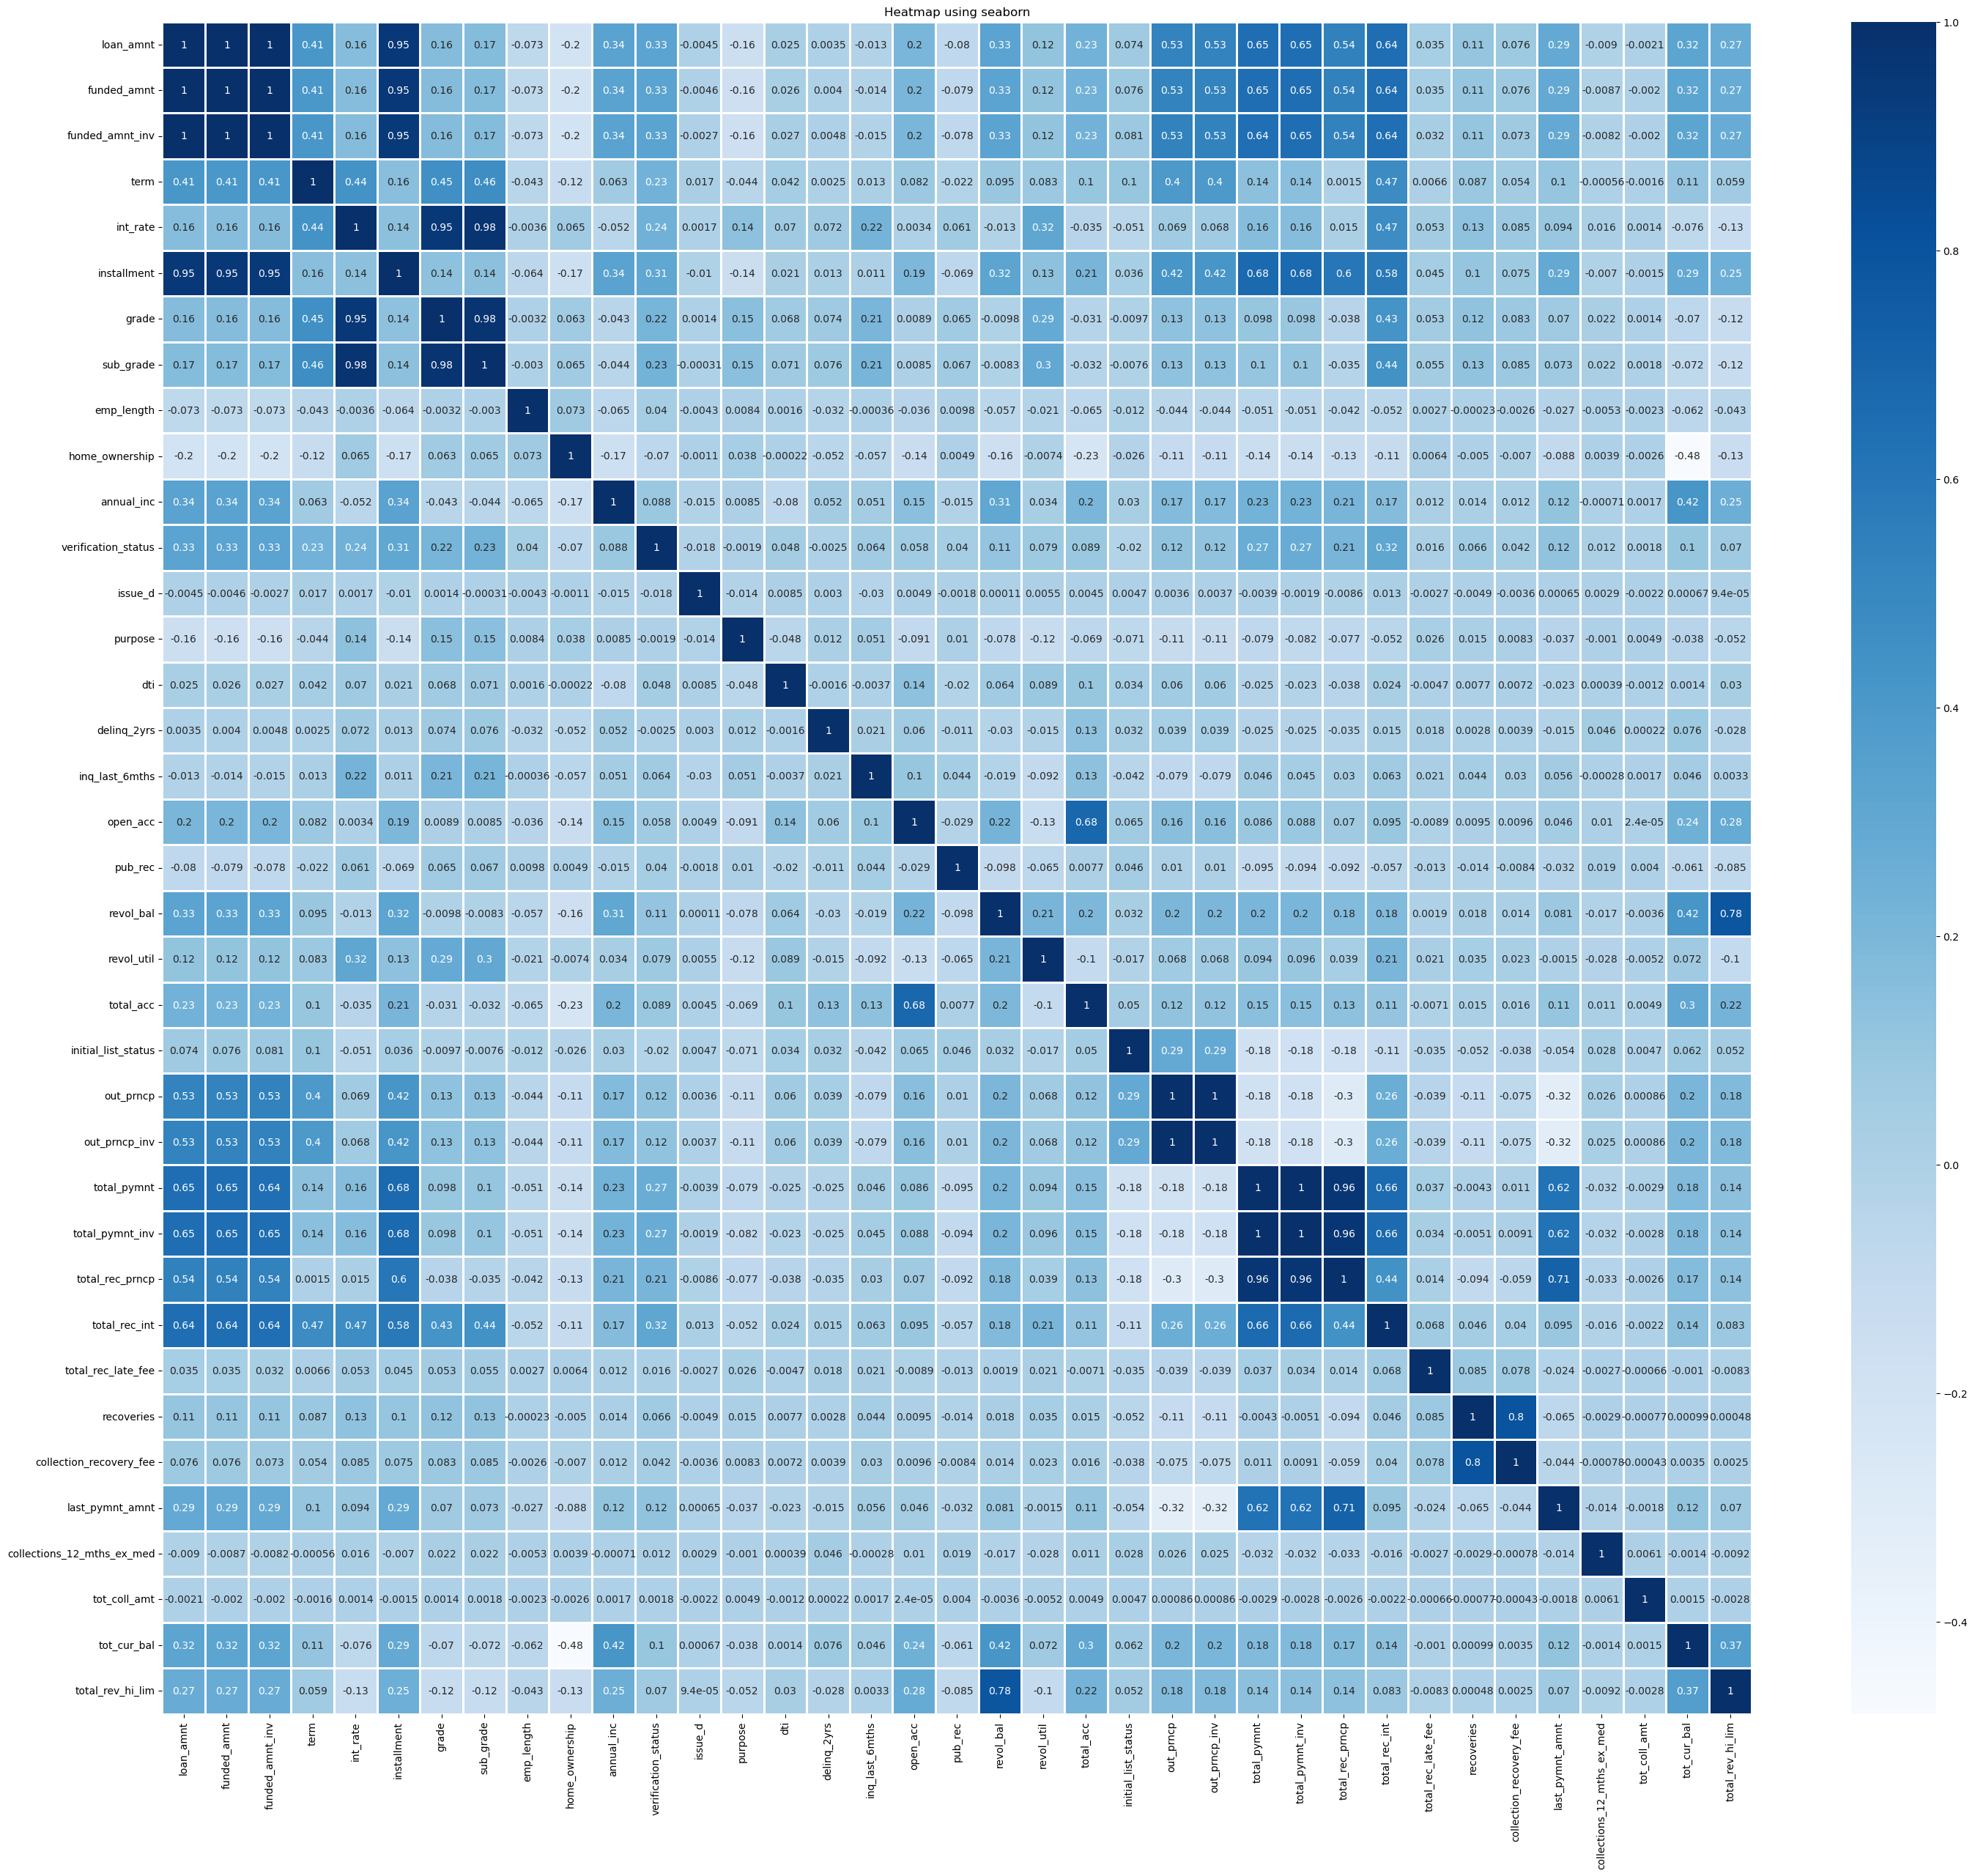

In [42]:
plt.figure(figsize=(35,30))
heatmap=sns.heatmap(cr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using seaborn")
plt.show()

In [43]:
#with the folowing function we can slect highly corelated features
#it will remove the first feature that is corelatd with anything other feature

In [44]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [45]:
corr_features=correlation(x_train, 0.6)
len(set(corr_features))

14

In [46]:
corr_features

{'collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [47]:
train_data1=train_data.drop(corr_features,axis=1)

In [48]:
train_data1

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,default_ind
0,5000.0,0,10.65,1,5,24000.0,2,19,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,0,0.00,0.00,0.00,0.0,0.0,82104.0,0
1,2500.0,1,15.27,10,5,30000.0,1,19,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,0,0.00,0.00,117.08,0.0,0.0,82104.0,1
2,2400.0,0,15.96,1,5,12252.0,0,19,11,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,0,0.00,0.00,0.00,0.0,0.0,82104.0,0
3,10000.0,0,13.49,1,5,49200.0,1,19,9,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,0,0.00,16.97,0.00,0.0,0.0,82104.0,0
4,3000.0,1,12.69,0,5,80000.0,1,19,9,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,0,766.90,0.00,0.00,0.0,0.0,82104.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4200.0,0,7.89,1,5,62000.0,0,76,2,14.60,0.0,1.0,19.0,1.0,6481.0,34.5,0,3991.75,0.00,0.00,0.0,0.0,31452.0,0
499996,18000.0,0,12.05,9,5,84000.0,2,76,2,23.80,0.0,0.0,11.0,1.0,13625.0,66.5,0,17582.46,0.00,0.00,0.0,0.0,308599.0,0
499997,3775.0,0,17.57,2,5,60000.0,1,76,7,23.96,2.0,3.0,13.0,0.0,1050.0,26.9,1,3613.03,0.00,0.00,0.0,0.0,93539.0,0
499998,10000.0,0,5.32,5,1,90000.0,0,76,2,28.37,1.0,0.0,13.0,0.0,9159.0,30.4,1,9485.23,0.00,0.00,0.0,0.0,348479.0,0


In [49]:
test_data=test_data.drop('collection_recovery_fee',axis=1)
test_data=test_data.drop('funded_amnt',axis=1)
test_data=test_data.drop('funded_amnt_inv',axis=1)
test_data=test_data.drop('grade',axis=1)
test_data=test_data.drop('installment',axis=1)
test_data=test_data.drop('last_pymnt_amnt',axis=1)
test_data=test_data.drop('out_prncp_inv',axis=1)
test_data=test_data.drop('sub_grade',axis=1)
test_data=test_data.drop('total_acc',axis=1)
test_data=test_data.drop('total_pymnt',axis=1)
test_data=test_data.drop('total_pymnt_inv',axis=1)
test_data=test_data.drop('total_rec_int',axis=1)
test_data=test_data.drop('total_rec_prncp',axis=1)
test_data=test_data.drop('total_rev_hi_lim',axis=1)

In [50]:
test_data.shape

(355969, 23)

In [51]:
x1=train_data1.iloc[:,0:-1]
y1=train_data1.iloc[:,-1]

In [52]:
x1.shape

(500000, 23)

In [53]:
y1.shape

(500000,)

In [54]:
x_train_nc,x_test_nc,y_train_nc,y_test_nc=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [55]:
x_train_nc.shape,x_test_nc.shape,y_train_nc.shape,y_test_nc.shape

((400000, 23), (100000, 23), (400000,), (100000,))

# Base Model

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [57]:
lg.fit(x_train_nc,y_train_nc)

LogisticRegression()

In [58]:
p1=lg.predict(x_test_nc)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cf1=confusion_matrix(y_test_nc,p1)
cf1

array([[91370,     3],
       [ 3852,  4775]], dtype=int64)

In [61]:
ac1=cf1.diagonal().sum()/cf1.sum()*100
ac1

96.145

In [62]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [63]:
print(classification_report(y_test_nc,p1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     91373
           1       1.00      0.55      0.71      8627

    accuracy                           0.96    100000
   macro avg       0.98      0.78      0.85    100000
weighted avg       0.96      0.96      0.96    100000



In [64]:
lg_f1=f1_score(y_test_nc,p1)
lg_pr1=precision_score(y_test_nc,p1)
lg_r1=recall_score(y_test_nc,p1)
print(lg_f1,lg_pr1,lg_r1)

0.7124207385303991 0.9993721222268732 0.5534948417758201


# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [66]:
dt.fit(x_train_nc,y_train_nc)

DecisionTreeClassifier()

In [67]:
dt_p=dt.predict(x_test_nc)

In [68]:
dt_c=confusion_matrix(y_test_nc,dt_p)
dt_c

array([[87503,  3870],
       [ 3132,  5495]], dtype=int64)

In [69]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

92.998

In [70]:
print(classification_report(y_test_nc,dt_p))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     91373
           1       0.59      0.64      0.61      8627

    accuracy                           0.93    100000
   macro avg       0.78      0.80      0.79    100000
weighted avg       0.93      0.93      0.93    100000



In [71]:
dt_f1=f1_score(y_test_nc,dt_p)
dt_pr1=precision_score(y_test_nc,dt_p)
dt_r1=recall_score(y_test_nc,dt_p)
print(dt_f1,dt_pr1,dt_r1)

0.6108270342374389 0.586759209823812 0.6369537498551061


# Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [73]:
rf.fit(x_train_nc,y_train_nc)

RandomForestClassifier()

In [74]:
rf_p1=rf.predict(x_test_nc)

In [75]:
rf_c1=confusion_matrix(y_test_nc,rf_p1)
rf_c1

array([[91316,    57],
       [ 3745,  4882]], dtype=int64)

In [76]:
rf_ac1=rf_c1.diagonal().sum()/rf_c1.sum()*100
rf_ac1

96.198

In [77]:
print(classification_report(y_test_nc,rf_p1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     91373
           1       0.99      0.57      0.72      8627

    accuracy                           0.96    100000
   macro avg       0.97      0.78      0.85    100000
weighted avg       0.96      0.96      0.96    100000



In [78]:
rf_f1=f1_score(y_test_nc,rf_p1)
rf_pr1=precision_score(y_test_nc,rf_p1)
rf_r1=recall_score(y_test_nc,rf_p1)
print(rf_f1,rf_pr1,rf_r1)

0.7197405277900633 0.9884592022676655 0.5658977628376028


# XGB

In [79]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [80]:
xgb.fit(x_train_nc,y_train_nc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [81]:
xgb_p=xgb.predict(x_test_nc)

In [82]:
xgb_cf=confusion_matrix(y_test_nc,xgb_p)
xgb_cf

array([[91248,   125],
       [ 3654,  4973]], dtype=int64)

In [83]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

96.221

In [84]:
print(classification_report(y_test_nc,xgb_p))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     91373
           1       0.98      0.58      0.72      8627

    accuracy                           0.96    100000
   macro avg       0.97      0.79      0.85    100000
weighted avg       0.96      0.96      0.96    100000



In [85]:
xgb_f1=f1_score(y_test_nc,xgb_p)
xgb_pr1=precision_score(y_test_nc,xgb_p)
xgb_r1=recall_score(y_test_nc,xgb_p)
print(xgb_f1,xgb_pr1,xgb_r1)

0.724663023679417 0.9754805806198509 0.5764460414976237


# KNN

In [86]:
#from sklearn.neighbors import KNeighborsClassifier
#knn=KNeighborsClassifier()

In [87]:
#knn.fit(x_train_nc,y_train)

In [88]:
#knn_p1=knn.predict(x_test_nc)

In [89]:
#knn_c1=confusion_matrix(y_test_nc,knn_p1)
#

In [90]:
#knn_ac1=knn_c1.diagonal().sum()/knn_c1.sum()*100
#

In [91]:
#print(classification_report(y_test_nc,knn_p1))

In [92]:
#knn_f1=f1_score(y_test_nc,knn_p1)
#knn_pr1=precision_score(y_test_nc,knn_p1)
#knn_r1=recall_score(y_test_nc,knn_p1)
#print(knn_f1,knn_pr1,knn_r1)

# Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [94]:
nb.fit(x_train_nc,y_train_nc)

MultinomialNB()

In [95]:
nb_p=nb.predict(x_test_nc)

In [96]:
nb_cf=confusion_matrix(y_test_nc,nb_p)
nb_cf

array([[57915, 33458],
       [  672,  7955]], dtype=int64)

In [97]:
nb_ac=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_ac

65.86999999999999

In [98]:
print(classification_report(y_test_nc,nb_p))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     91373
           1       0.19      0.92      0.32      8627

    accuracy                           0.66    100000
   macro avg       0.59      0.78      0.55    100000
weighted avg       0.92      0.66      0.73    100000



In [99]:
nb_f1=f1_score(y_test_nc,nb_p)
nb_pr1=precision_score(y_test_nc,nb_p)
nb_r1=recall_score(y_test_nc,nb_p)
print(nb_f1,nb_pr1,nb_r1)

0.31794564348521176 0.1920894405138483 0.9221050191259997


In [100]:
L1=["Logistic","DT","Rf","XGB","NB"]
L2=[ac1,dt_ac,rf_ac1,xgb_ac,nb_ac]
L3=[lg_pr1,dt_pr1,rf_pr1,xgb_pr1,nb_pr1]
L4=[lg_r1,dt_r1,rf_r1,xgb_r1,nb_r1]
L5=[lg_f1,dt_f1,rf_f1,xgb_f1,nb_f1]

In [101]:
df1=pd.DataFrame({"Model":L1,"Accuracy":L2,"Precision":L3,"Recall":L4,"f1_score":L5})
df1

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,96.145,0.999372,0.553495,0.712421
1,DT,92.998,0.586759,0.636954,0.610827
2,Rf,96.198,0.988459,0.565898,0.719741
3,XGB,96.221,0.975481,0.576446,0.724663
4,NB,65.870,0.192089,0.922105,0.317946


# Class imbalance

In [102]:
train_data1.default_ind.value_counts()

0    456693
1     43307
Name: default_ind, dtype: int64

[]

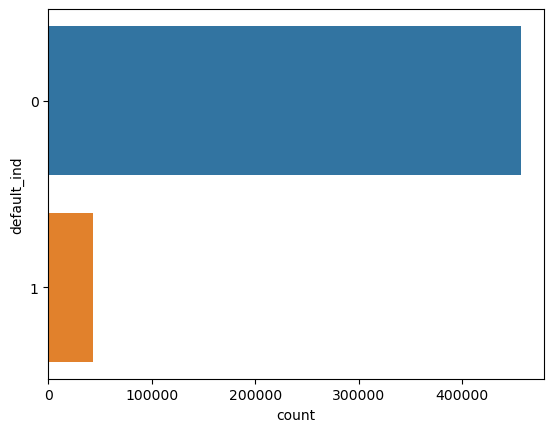

In [103]:
sns.countplot(y="default_ind",data=train_data1)
plt.plot()

# Random -Under sampling

In [104]:
c_0,c_1=train_data1["default_ind"].value_counts()
c_0,c_1

(456693, 43307)

In [105]:
train_0=train_data1[train_data1["default_ind"]==0]# all zeros record
train_1=train_data1[train_data1["default_ind"]==1]#all ones record
train_0.shape,train_1.shape

((456693, 24), (43307, 24))

In [106]:
class_0under=train_0.sample(c_1)

In [107]:
class_0under.shape,train_1.shape

((43307, 24), (43307, 24))

In [108]:
class0_1=pd.concat([class_0under,train_1],axis=0)#axis=0 row wise
class0_1.head
class0_1.shape

(86614, 24)

In [109]:
class0_1.default_ind.value_counts()

0    43307
1    43307
Name: default_ind, dtype: int64

In [110]:
x2=class0_1.iloc[:,1:-1]
y2=class0_1.iloc[:,-1]

In [111]:
x2.shape,y2.shape

((86614, 22), (86614,))

In [112]:
final_df=pd.concat([x2,y2],axis=1)
final_df.head(2)

,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,default_ind
234395,0,12.99,10,4,35360.0,0,75,2,22.78,0.0,0.0,10.0,0.0,16026.0,82.6,1,4778.63,0.0,0.0,0.0,0.0,20184.0,0
436824,1,21.48,6,5,100000.0,1,30,2,22.91,0.0,0.0,8.0,0.0,12227.0,67.6,0,14032.90,0.0,0.0,0.0,581.0,73569.0,0


In [113]:
x_tr,x_te,y_tr,y_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [114]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((69291, 22), (17323, 22), (69291,), (17323,))

# IMBlearn-Under sampling

In [115]:
#import imblearn
#from imblearn.under_sampling import RandomUnderSampler

In [116]:
#train_data1.default_ind.value_counts()

In [117]:
#d_x=train_data1.iloc[:,1:-1]
#d_y=train_data1.iloc[:,-1]

In [118]:
#a1=RandomUnderSampler(sampling_strategy="all")

In [119]:
#x3,y3,=a1.fit_resample(d_x,d_y)
#x3.shape,y3.shape

In [120]:
#x_tr1,x_te1,y_tr1,y_te1=train_test_split(x3,y3,test_size=0.2,random_state=100)

In [121]:
#x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

# Near Miss Under_Sampling Technique

In [122]:
#from imblearn.under_sampling import NearMiss
#nm=NearMiss()

In [123]:
#x_1=train_data1.iloc[:,1:-1]
#y_1=train_data1.iloc[:,-1]

In [124]:
#y_1.value_counts()

In [125]:
#x4,y4=nm.fit_resample(hx_1,y_1)

In [126]:
#x4.shape,y4.shape

# SMOTE(Synthetic Minority Oversampling Technique)

In [127]:
#hr_x=train_data1.iloc[:,0:-1]
#hr_y=train_data1.iloc[:,-1]

In [128]:
#hr_y.value_counts()

In [129]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()

In [130]:
#y_smote=smote.fit_resample(hr_x,hr_y)

In [131]:
#x_smote.shape,y_smote.shape

In [132]:
#y_smote.value_counts()

# Random over sampling

In [133]:
#c1_0,c1_1=train_data1["default_ind"].value_counts()
#c1_0,c1_1 

In [134]:
#train1_0=train_data1[train_data1["default_ind"]==0]
#=train_data1[train_data1["default_ind"]==1]
#train1_0.shape,train1_1.shape

In [135]:
#class_1over=train1_1.sample(c_0,replace=True)

In [136]:
#class_1over.head()
#class_1over.shape,train_0.shape

In [137]:
#class1_0=pd.concat([class_1over,train1_0],axis=0)
#class1_0.shape

In [138]:
#class1_0.is_promoted.value_counts()

In [139]:
#x5=class1_0.iloc[:,1:-1]
#y5=class1_0.iloc[:,-1]

In [140]:
#x1_tr,x1_te,y1_tr,y1_te=train_test_split(x5,y5,test_size=0.2,random_state=100)
#x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

# outlier

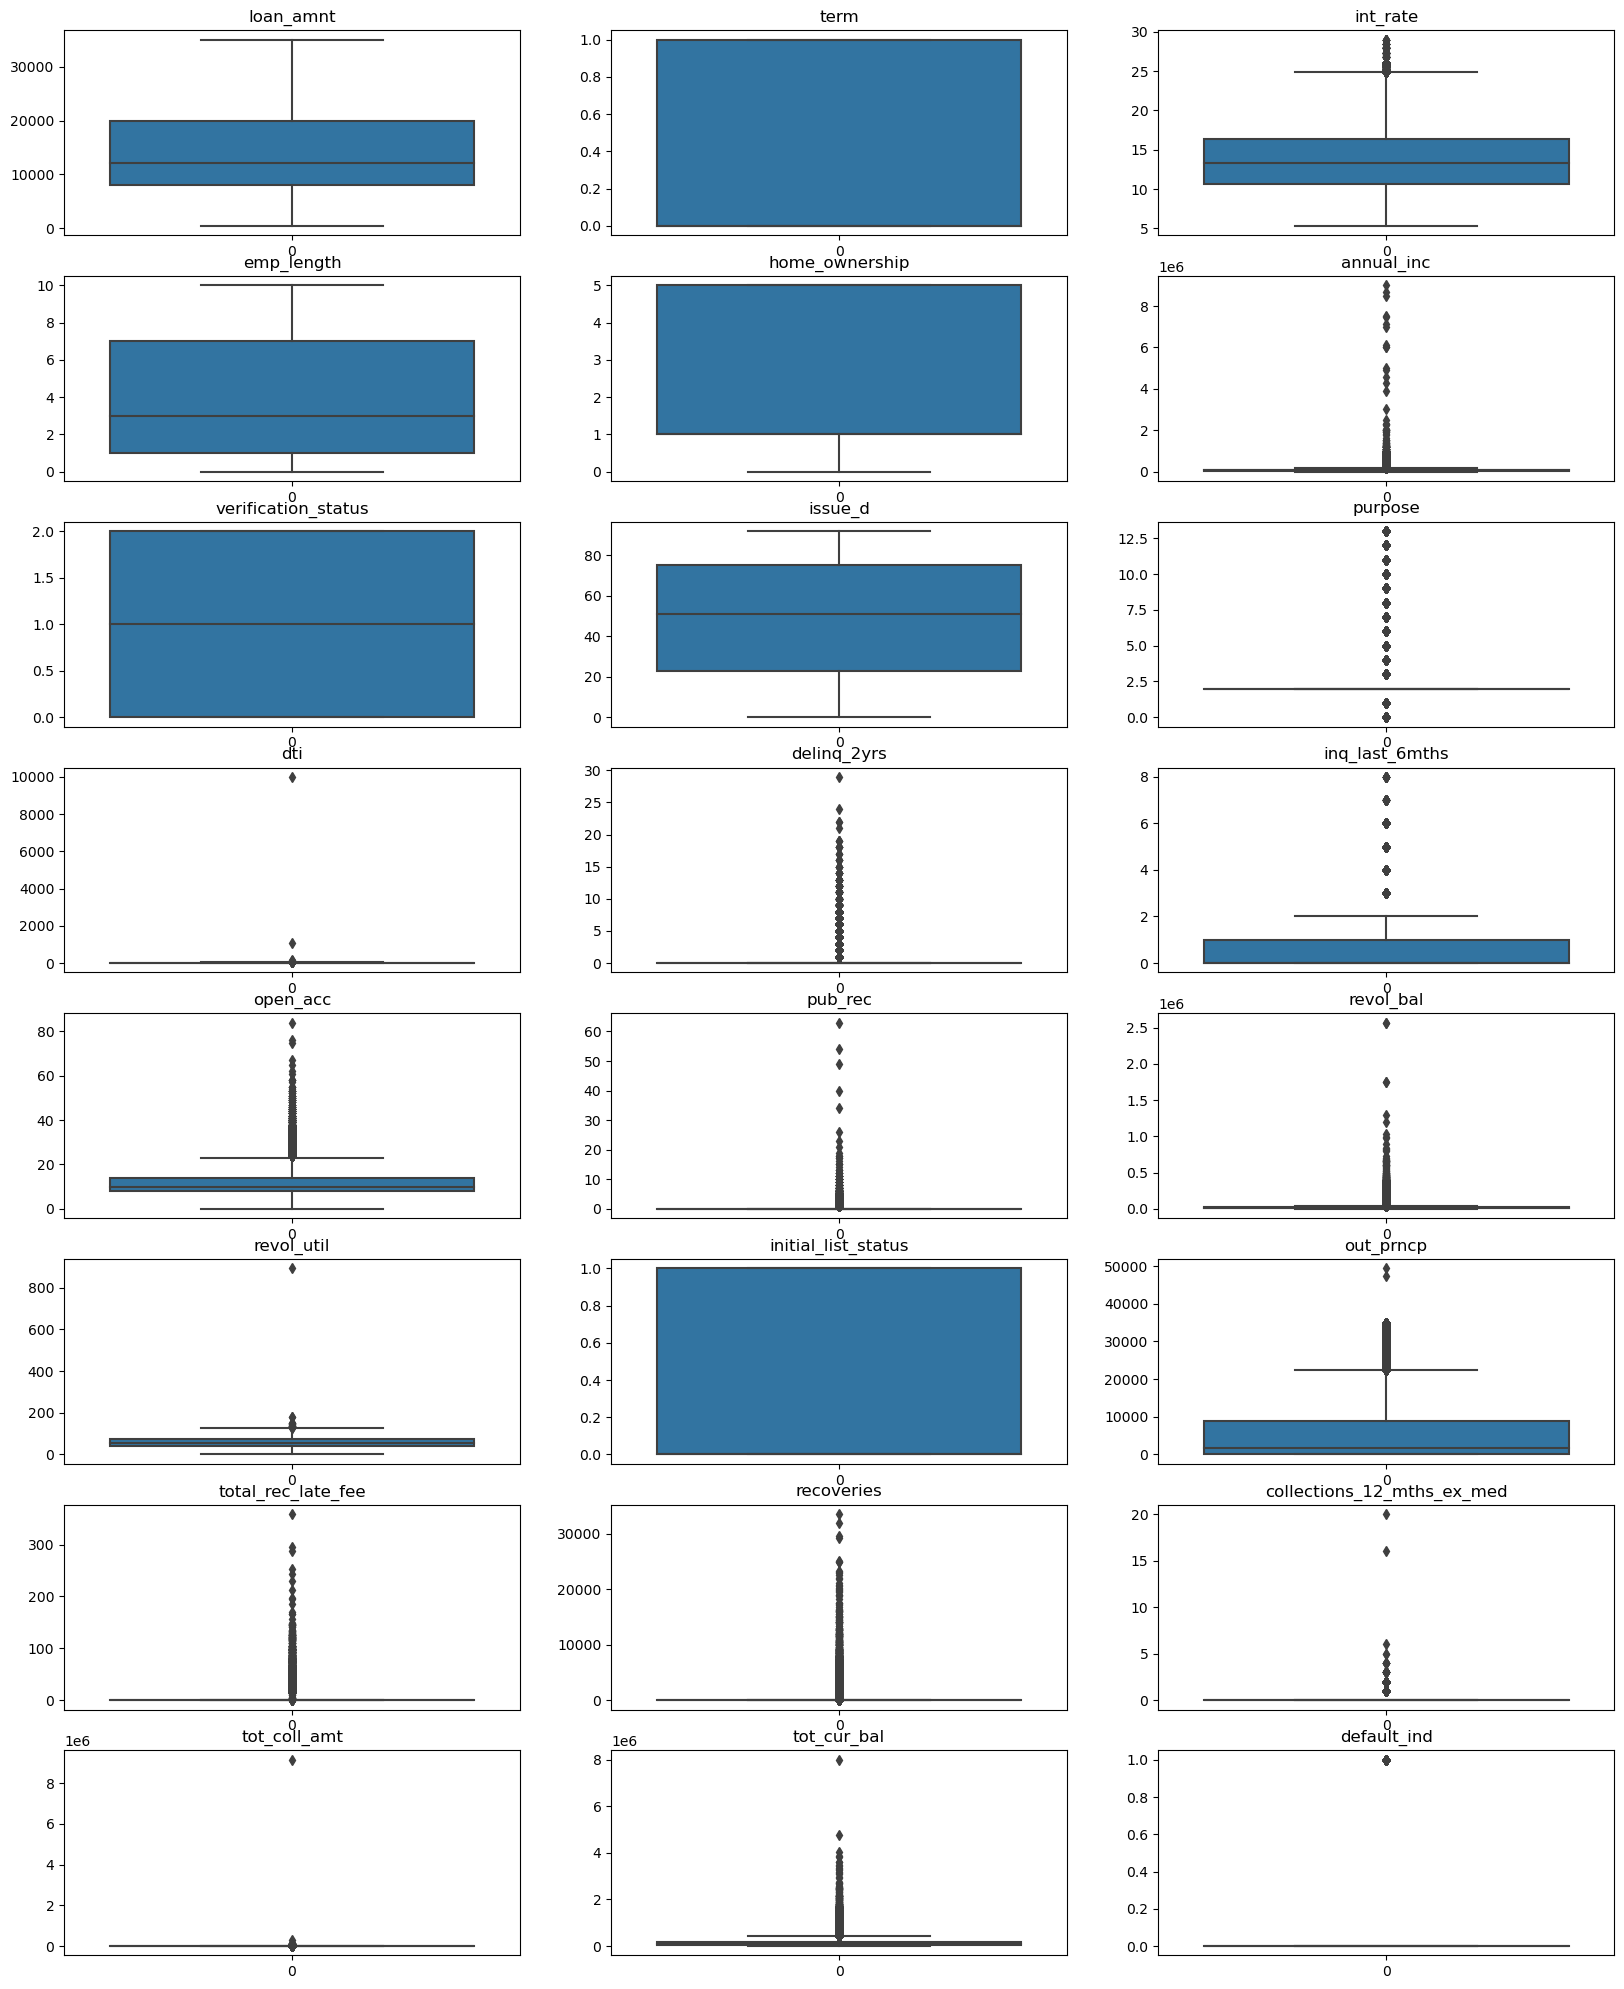

In [141]:
num_cols=train_data1.columns
fig,ax=plt.subplots(8,3,figsize=(20,25))
index=0
ax=ax.flatten()
for i in train_data1:
        sns.boxplot(train_data1[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1
plt.show()

In [142]:
train_data1.skew()

loan_amnt                       0.720801
term                            0.990400
int_rate                        0.366150
emp_length                      0.583705
home_ownership                  0.077613
annual_inc                     43.542784
verification_status            -0.078042
issue_d                        -0.054941
purpose                         2.381879
dti                           461.843704
delinq_2yrs                     5.288422
inq_last_6mths                  1.567258
open_acc                        1.188304
pub_rec                        13.850977
revol_bal                      18.431814
revol_util                     -0.146744
initial_list_status             0.435038
out_prncp                       1.516698
total_rec_late_fee             15.831631
recoveries                     13.499943
collections_12_mths_ex_med     26.718005
tot_coll_amt                  692.351576
tot_cur_bal                     3.321626
default_ind                     2.939448
dtype: float64

<Axes: ylabel='int_rate'>

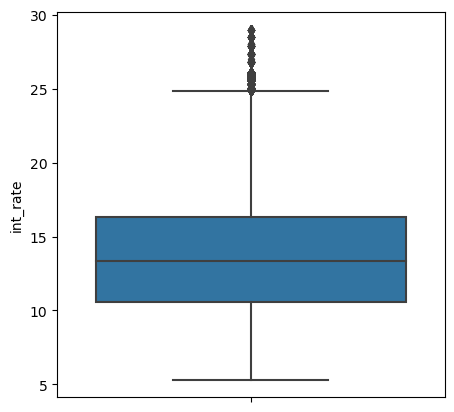

In [143]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=train_data1,y="int_rate")

<Axes: xlabel='int_rate', ylabel='Density'>

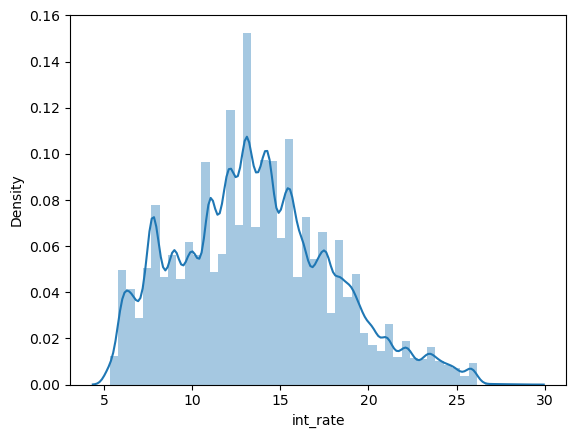

In [144]:
sns.distplot(train_data1.int_rate) 

<Axes: >

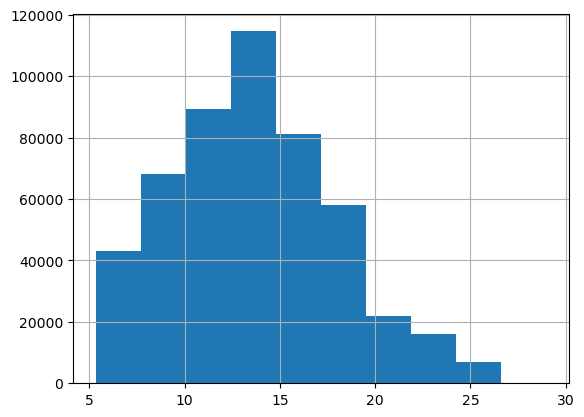

In [145]:
train_data1.int_rate.hist()

In [146]:
IQR1=train_data1.int_rate.quantile(0.75)-train_data1.int_rate.quantile(0.25)
IQR1

5.699999999999999

In [147]:
ub1=train_data1.int_rate.quantile(0.75)+3*IQR1
ub1

33.39

In [148]:
train_data1.loc[train_data1["int_rate"]>33,"int_rate"]=33

<Axes: xlabel='int_rate', ylabel='Density'>

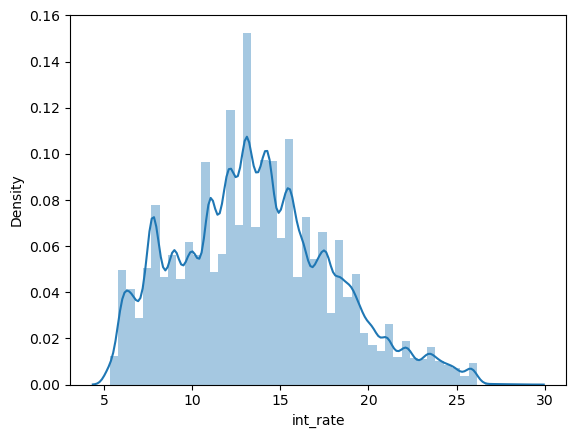

In [149]:
sns.distplot(train_data1.int_rate) 

<Axes: >

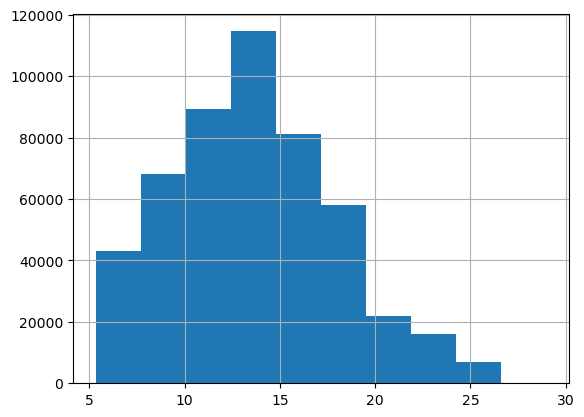

In [150]:
train_data1.int_rate.hist()

<Axes: ylabel='open_acc'>

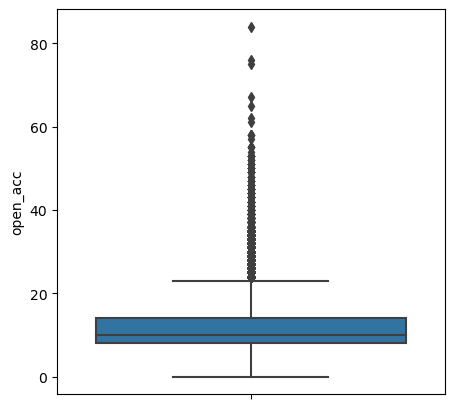

In [151]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=train_data1,y="open_acc")

<Axes: xlabel='open_acc', ylabel='Density'>

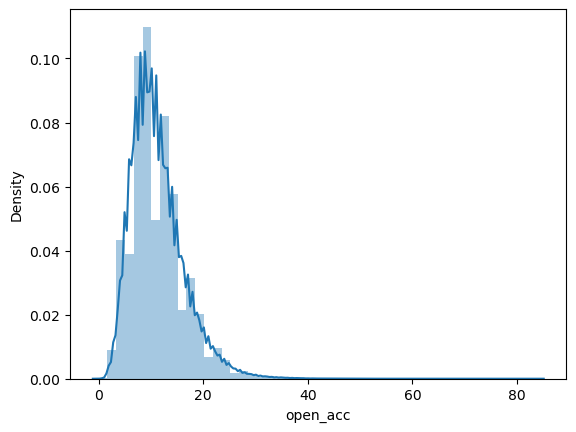

In [152]:
sns.distplot(train_data1.open_acc)

<Axes: >

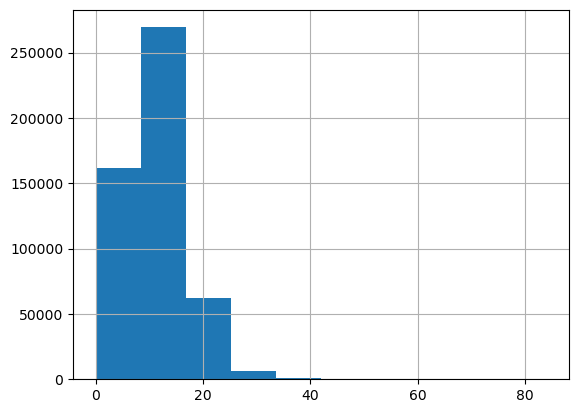

In [153]:
train_data1.open_acc.hist()

In [154]:
IQR2=train_data1.open_acc.quantile(0.75)-train_data1.open_acc.quantile(0.25)
IQR2

6.0

In [155]:
ub2=train_data1.open_acc.quantile(0.75)+3*IQR2
ub2

32.0

In [156]:
train_data1.loc[train_data1["open_acc"]>32,"open_acc"]=32

<Axes: xlabel='open_acc', ylabel='Density'>

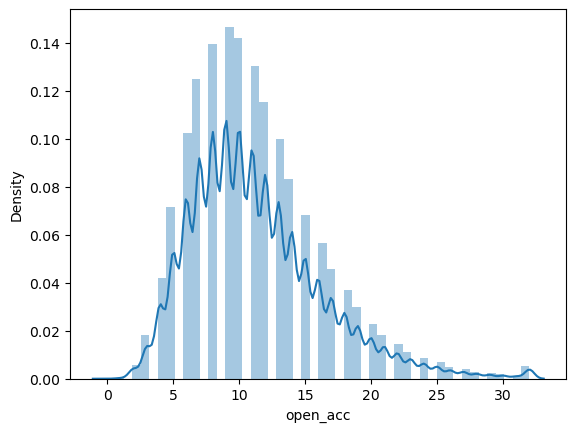

In [157]:
sns.distplot(train_data1.open_acc) 

<Axes: >

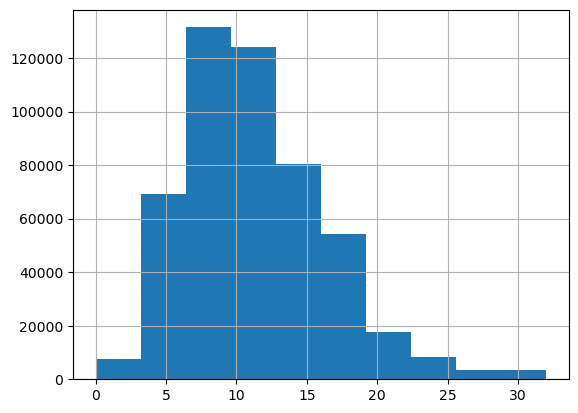

In [158]:
train_data1.open_acc.hist()

<Axes: ylabel='revol_bal'>

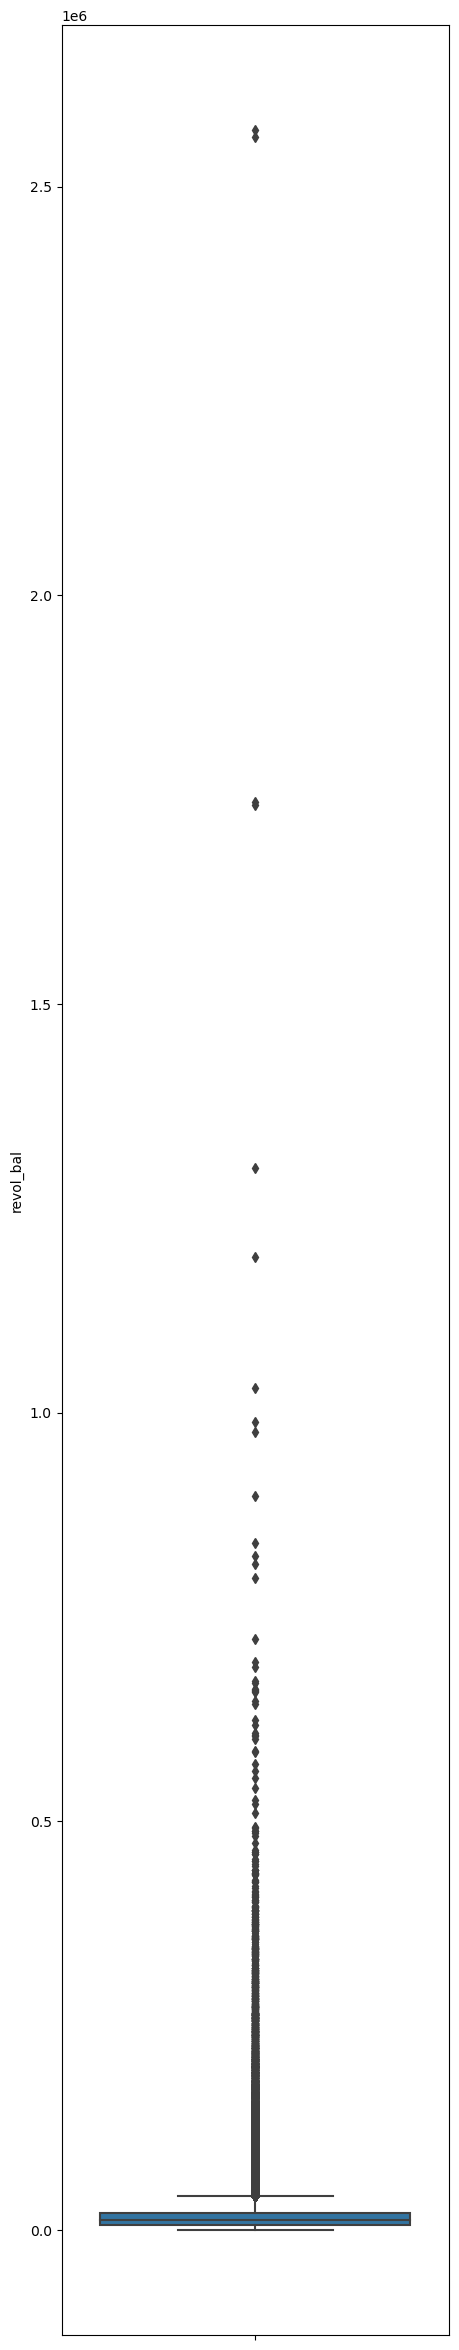

In [159]:
fig=plt.figure(figsize=(5,30))
sns.boxplot(data=train_data1,y="revol_bal")

<Axes: xlabel='revol_bal', ylabel='Density'>

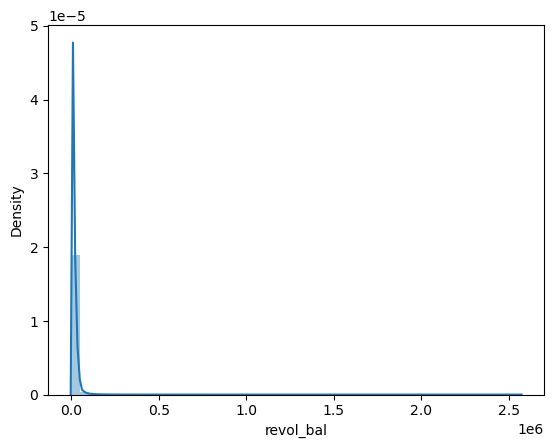

In [160]:
sns.distplot(train_data1.revol_bal) 

<Axes: >

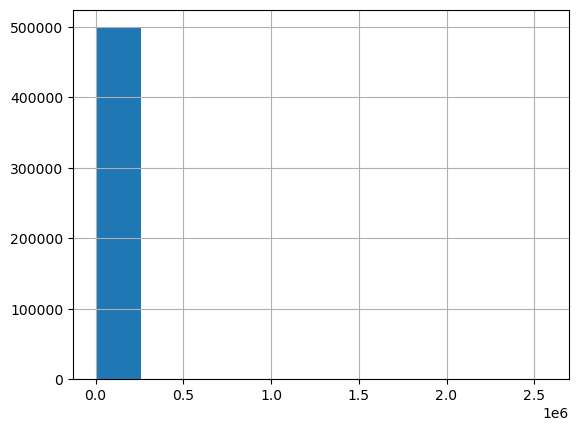

In [161]:
train_data1.revol_bal.hist()

In [162]:
IQR3=train_data1.revol_bal.quantile(0.75)-train_data1.revol_bal.quantile(0.25)
IQR3

14015.0

In [163]:
ub3=train_data1.revol_bal.quantile(0.75)+3*IQR3
ub3

62479.0

In [164]:
train_data1.loc[train_data1["revol_bal"]>62479,"revol_bal"]=62479

<Axes: xlabel='revol_bal', ylabel='Density'>

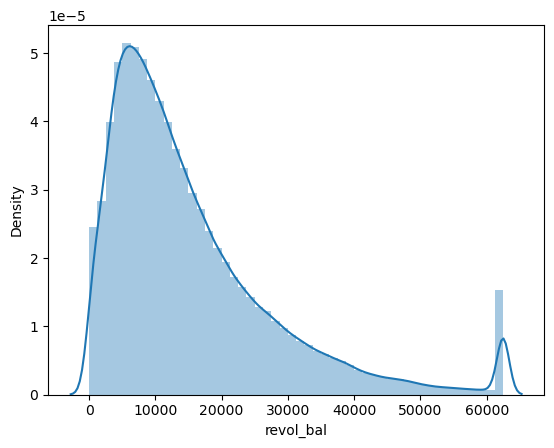

In [165]:
sns.distplot(train_data1.revol_bal) 

<Axes: ylabel='dti'>

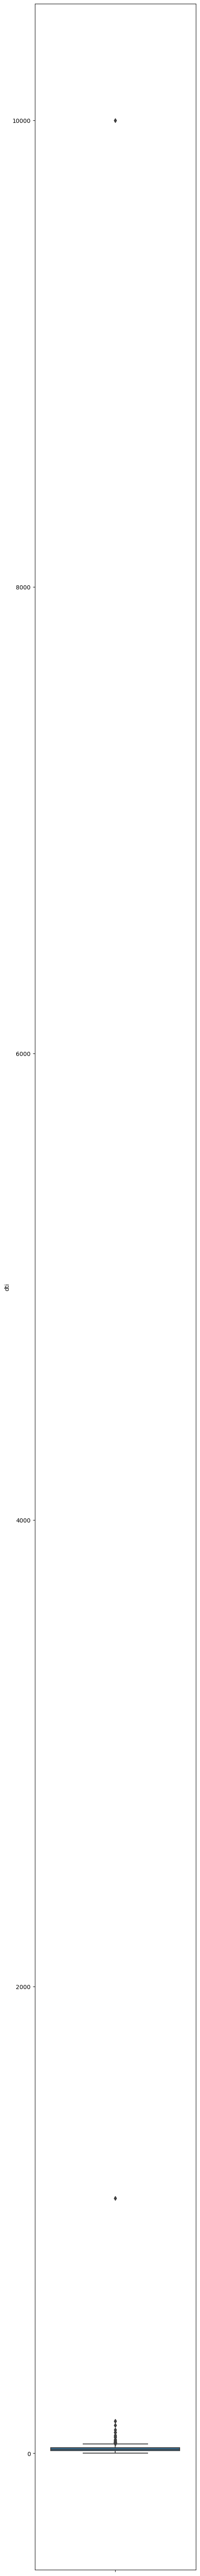

In [166]:
fig=plt.figure(figsize=(5,80))
sns.boxplot(data=train_data1,y="dti")

<Axes: xlabel='dti', ylabel='Density'>

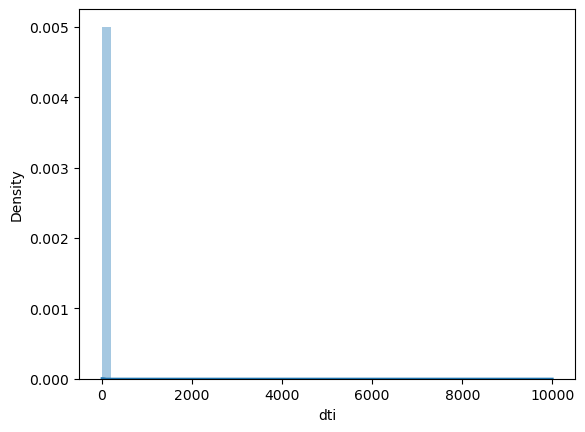

In [167]:
sns.distplot(train_data1.dti) 

<Axes: >

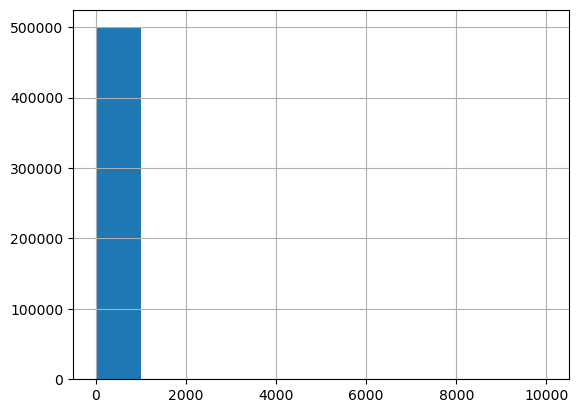

In [168]:
train_data1.dti.hist()

In [169]:
IQR4=train_data1.dti.quantile(0.75)-train_data1.dti.quantile(0.25)
IQR4

11.560000000000002

In [170]:
ub4=train_data1.dti.quantile(0.75)+3*IQR4
ub4

57.69000000000001

In [171]:
train_data1.loc[train_data1["dti"]>57,"dti"]=57

<Axes: xlabel='dti', ylabel='Density'>

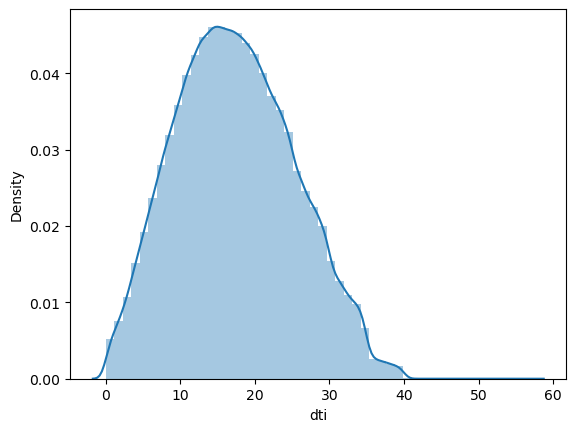

In [172]:
sns.distplot(train_data1.dti)

<Axes: >

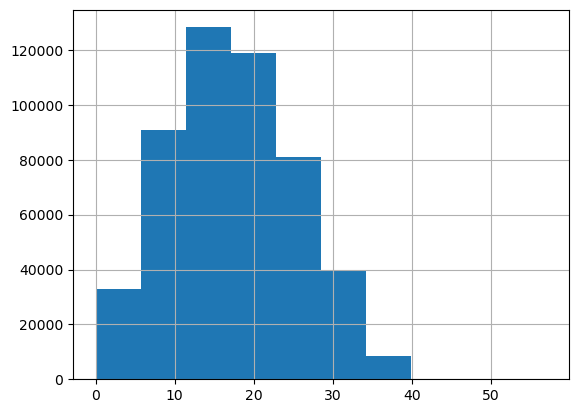

In [173]:
train_data1.dti.hist()

<Axes: ylabel='annual_inc'>

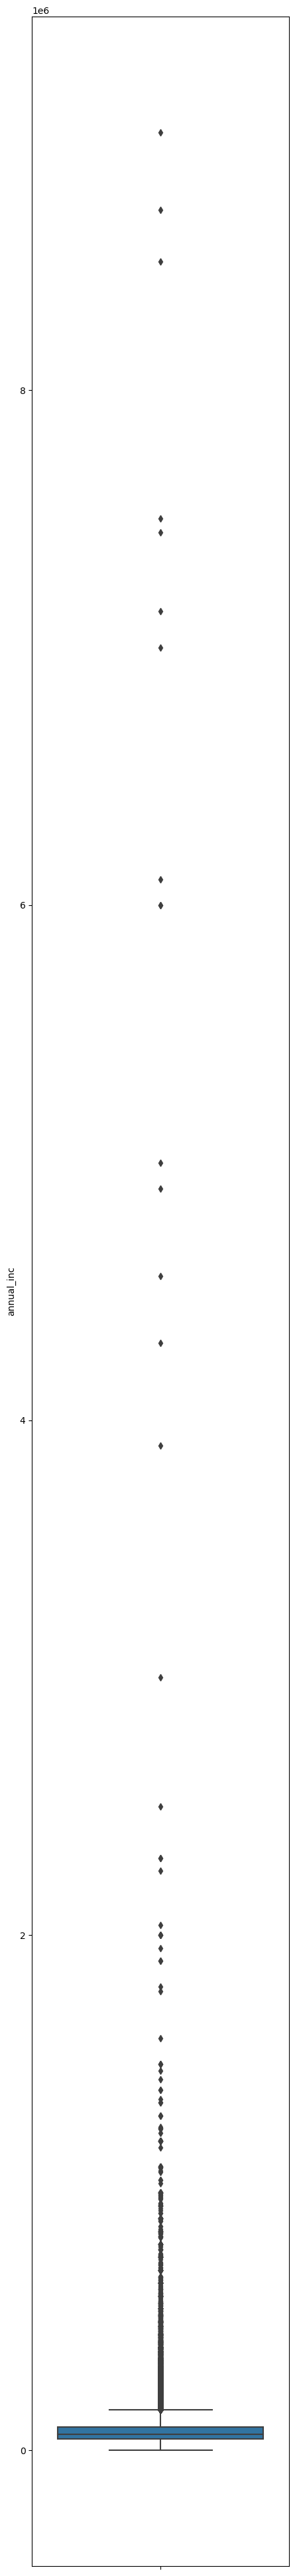

In [174]:
fig=plt.figure(figsize=(5,50))
sns.boxplot(data=train_data1,y="annual_inc")

<Axes: xlabel='annual_inc', ylabel='Density'>

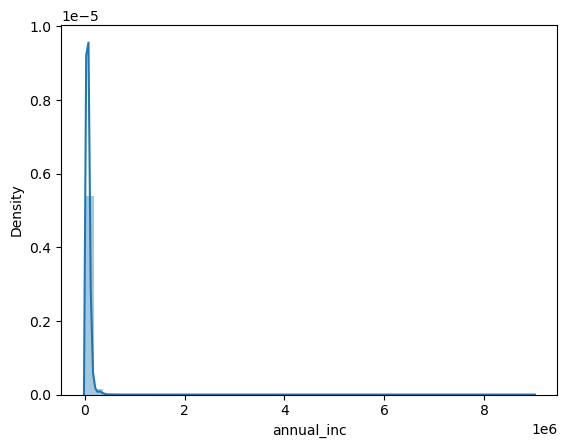

In [175]:
sns.distplot(train_data1.annual_inc)

<Axes: >

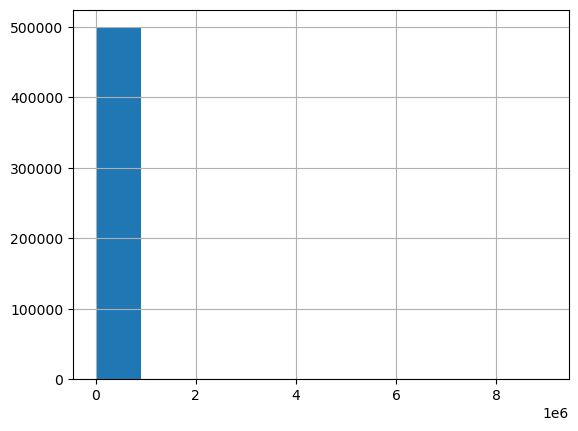

In [176]:
train_data1.annual_inc.hist()

In [177]:
IQR5=train_data1.annual_inc.quantile(0.75)-train_data1.annual_inc.quantile(0.25)
IQR5

45000.0

In [178]:
ub5=train_data1.annual_inc.quantile(0.75)+3*IQR5
ub5

225000.0

In [179]:
train_data1.loc[train_data1["annual_inc"]>225000,"annual_inc"]=225000

<Axes: xlabel='annual_inc', ylabel='Density'>

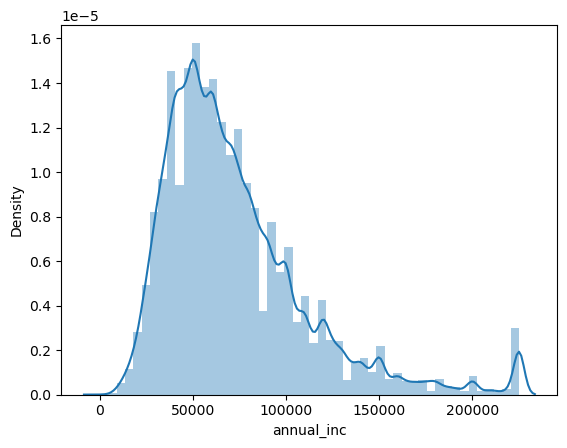

In [180]:
sns.distplot(train_data1.annual_inc)

<Axes: ylabel='revol_util'>

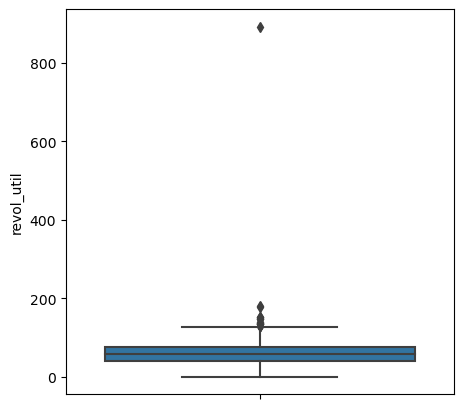

In [181]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=train_data1,y="revol_util")

<Axes: xlabel='revol_util', ylabel='Density'>

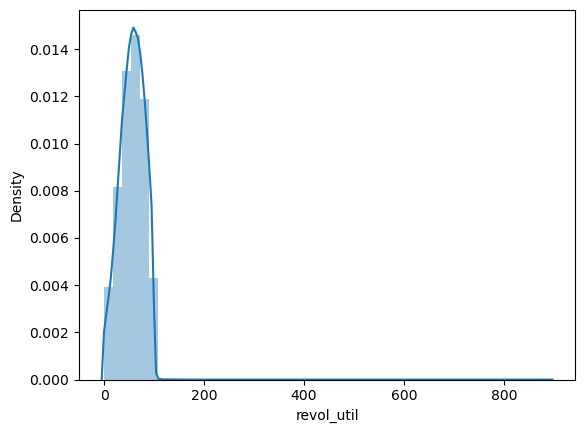

In [182]:
sns.distplot(train_data1.revol_util)

<Axes: >

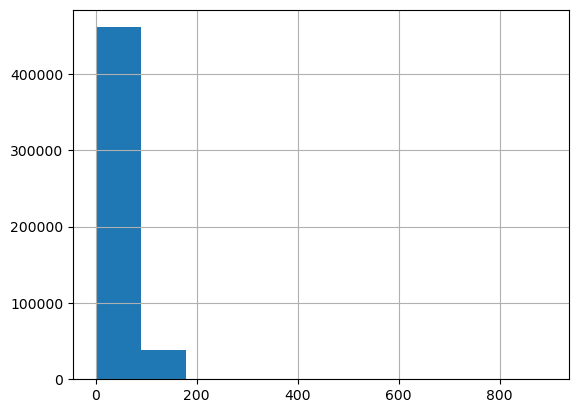

In [183]:
train_data1.revol_util.hist()

In [184]:
IQR6=train_data1.revol_util.quantile(0.75)-train_data1.revol_util.quantile(0.25)
IQR6

35.699999999999996

In [185]:
ub6=train_data1.revol_util.quantile(0.75)+3*IQR6
ub6

181.39999999999998

In [186]:
train_data1.loc[train_data1["revol_util"]>181,"revol_util"]=181

<Axes: xlabel='revol_util', ylabel='Density'>

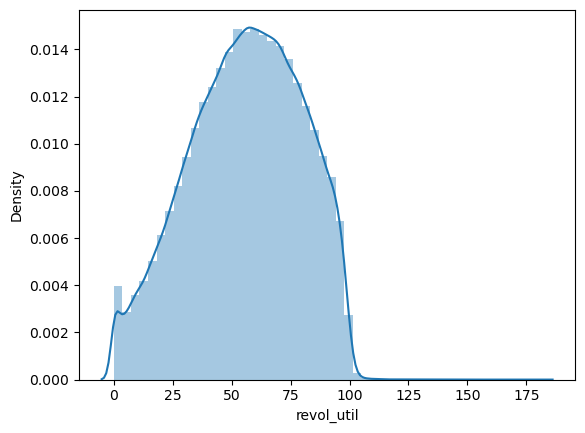

In [187]:
sns.distplot(train_data1.revol_util)

<Axes: >

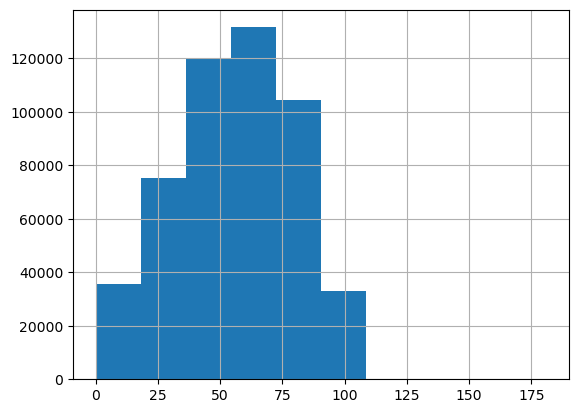

In [188]:
train_data1.revol_util.hist()

<Axes: ylabel='tot_cur_bal'>

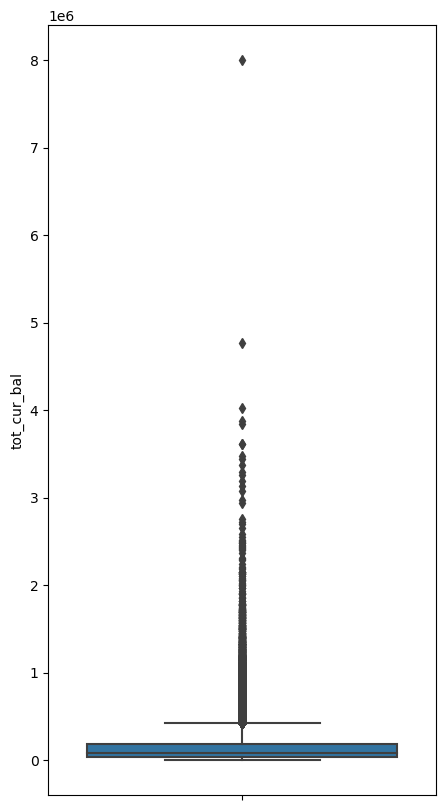

In [189]:
fig=plt.figure(figsize=(5,10))
sns.boxplot(data=train_data1,y="tot_cur_bal")

<Axes: xlabel='tot_cur_bal', ylabel='Density'>

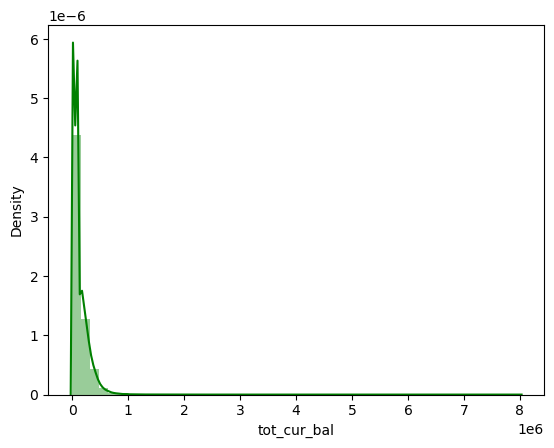

In [190]:
sns.distplot(train_data1.tot_cur_bal,color='green')

<Axes: >

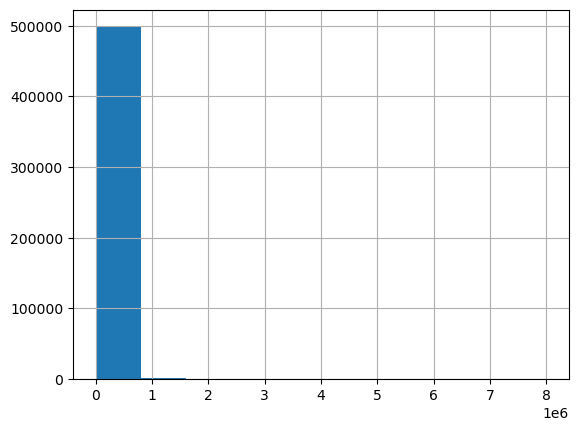

In [191]:
train_data1.tot_cur_bal.hist()

In [192]:
IQR7=train_data1.tot_cur_bal.quantile(0.75)-train_data1.tot_cur_bal.quantile(0.25)
IQR7

154686.5

In [193]:
ub7=train_data1.tot_cur_bal.quantile(0.75)+3*IQR7
ub7

652126.75

In [194]:
train_data1.loc[train_data1["tot_cur_bal"]>652126,"tot_cur_bal"]=652126

<Axes: xlabel='tot_cur_bal', ylabel='Density'>

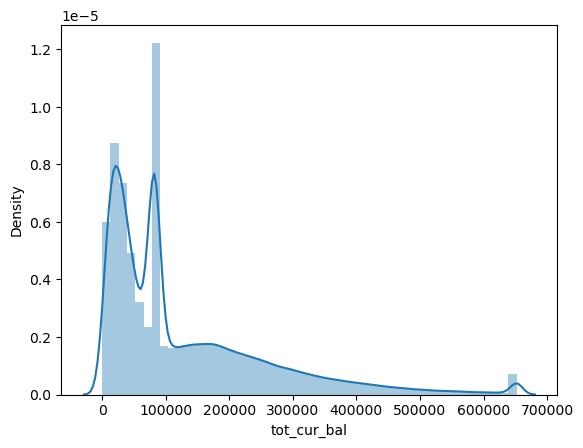

In [195]:
sns.distplot(train_data1.tot_cur_bal)

<Axes: >

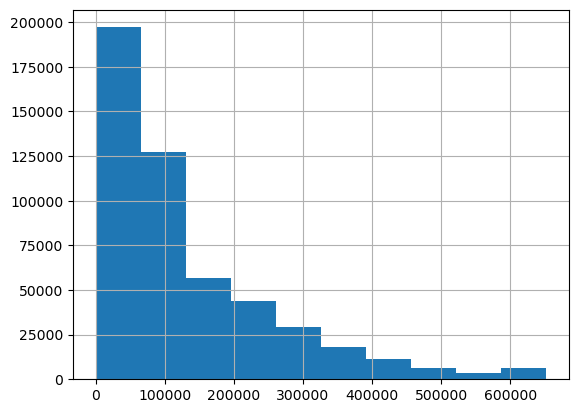

In [196]:
train_data1.tot_cur_bal.hist()

# Skewness Treatment

In [197]:
train_data1.skew()

loan_amnt                       0.720801
term                            0.990400
int_rate                        0.366150
emp_length                      0.583705
home_ownership                  0.077613
annual_inc                      1.546501
verification_status            -0.078042
issue_d                        -0.054941
purpose                         2.381879
dti                             0.208535
delinq_2yrs                     5.288422
inq_last_6mths                  1.567258
open_acc                        1.014514
pub_rec                        13.850977
revol_bal                       1.620425
revol_util                     -0.234206
initial_list_status             0.435038
out_prncp                       1.516698
total_rec_late_fee             15.831631
recoveries                     13.499943
collections_12_mths_ex_med     26.718005
tot_coll_amt                  692.351576
tot_cur_bal                     1.647500
default_ind                     2.939448
dtype: float64

<Axes: xlabel='annual_inc', ylabel='Density'>

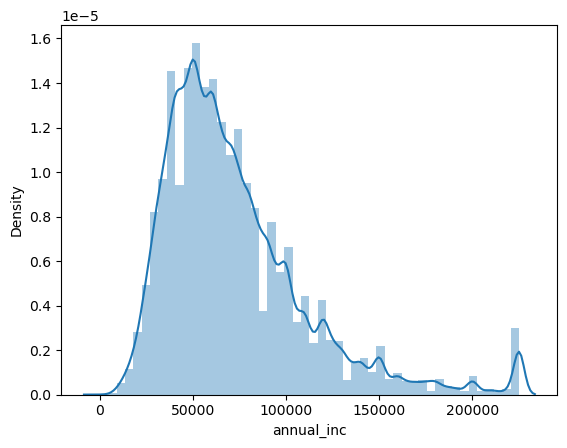

In [198]:
sns.distplot(train_data1.annual_inc)

In [199]:
train_data1['annual_inc']=np.sqrt(train_data1['annual_inc'])

In [200]:
train_data1.annual_inc.skew()

0.7666093293054448

<Axes: xlabel='annual_inc', ylabel='Density'>

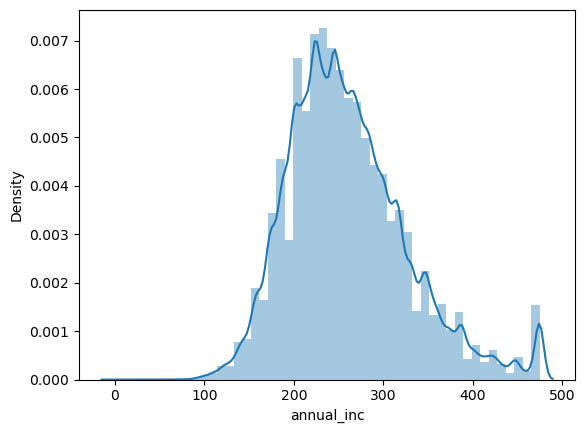

In [201]:
sns.distplot(train_data1.annual_inc)

<Axes: xlabel='revol_bal', ylabel='Density'>

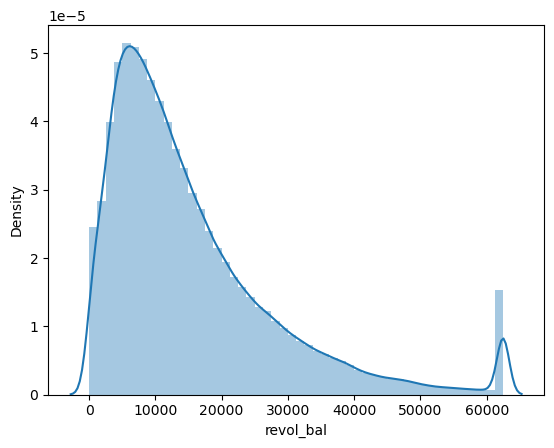

In [202]:
sns.distplot(train_data1.revol_bal)

In [203]:
train_data1['revol_bal']=np.sqrt(train_data1['revol_bal'])

In [204]:
train_data1.revol_bal.skew()

0.5424167378659103

<Axes: xlabel='revol_bal', ylabel='Density'>

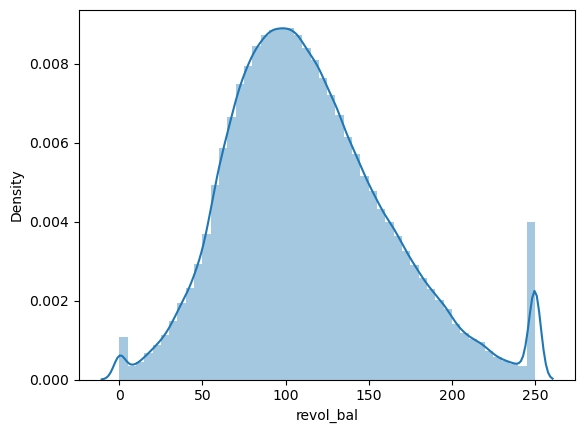

In [205]:
sns.distplot(train_data1.revol_bal)

In [206]:
train_data1.tot_cur_bal.describe()

count    500000.000000
mean     129849.473124
std      131320.435136
min           0.000000
25%       33380.750000
50%       82104.000000
75%      188067.250000
max      652126.000000
Name: tot_cur_bal, dtype: float64

<Axes: xlabel='tot_cur_bal', ylabel='Density'>

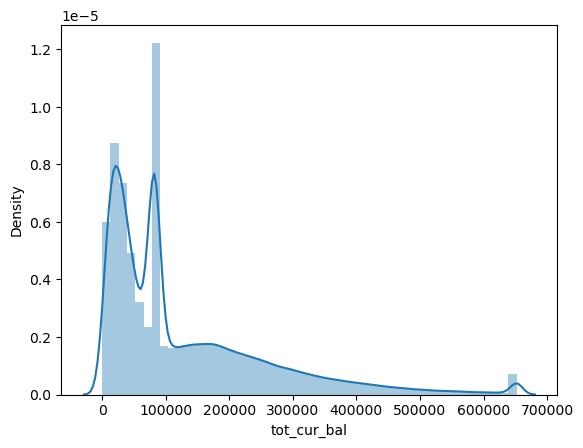

In [207]:
sns.distplot(train_data1.tot_cur_bal)

In [208]:
train_data1['tot_cur_bal']=np.sqrt(train_data1['tot_cur_bal'])

In [209]:
train_data1.tot_cur_bal.skew()

0.6955810400001082

In [210]:
train_data1.skew()

loan_amnt                       0.720801
term                            0.990400
int_rate                        0.366150
emp_length                      0.583705
home_ownership                  0.077613
annual_inc                      0.766609
verification_status            -0.078042
issue_d                        -0.054941
purpose                         2.381879
dti                             0.208535
delinq_2yrs                     5.288422
inq_last_6mths                  1.567258
open_acc                        1.014514
pub_rec                        13.850977
revol_bal                       0.542417
revol_util                     -0.234206
initial_list_status             0.435038
out_prncp                       1.516698
total_rec_late_fee             15.831631
recoveries                     13.499943
collections_12_mths_ex_med     26.718005
tot_coll_amt                  692.351576
tot_cur_bal                     0.695581
default_ind                     2.939448
dtype: float64

# visulization

In [283]:
cr1=train_data1.corr()

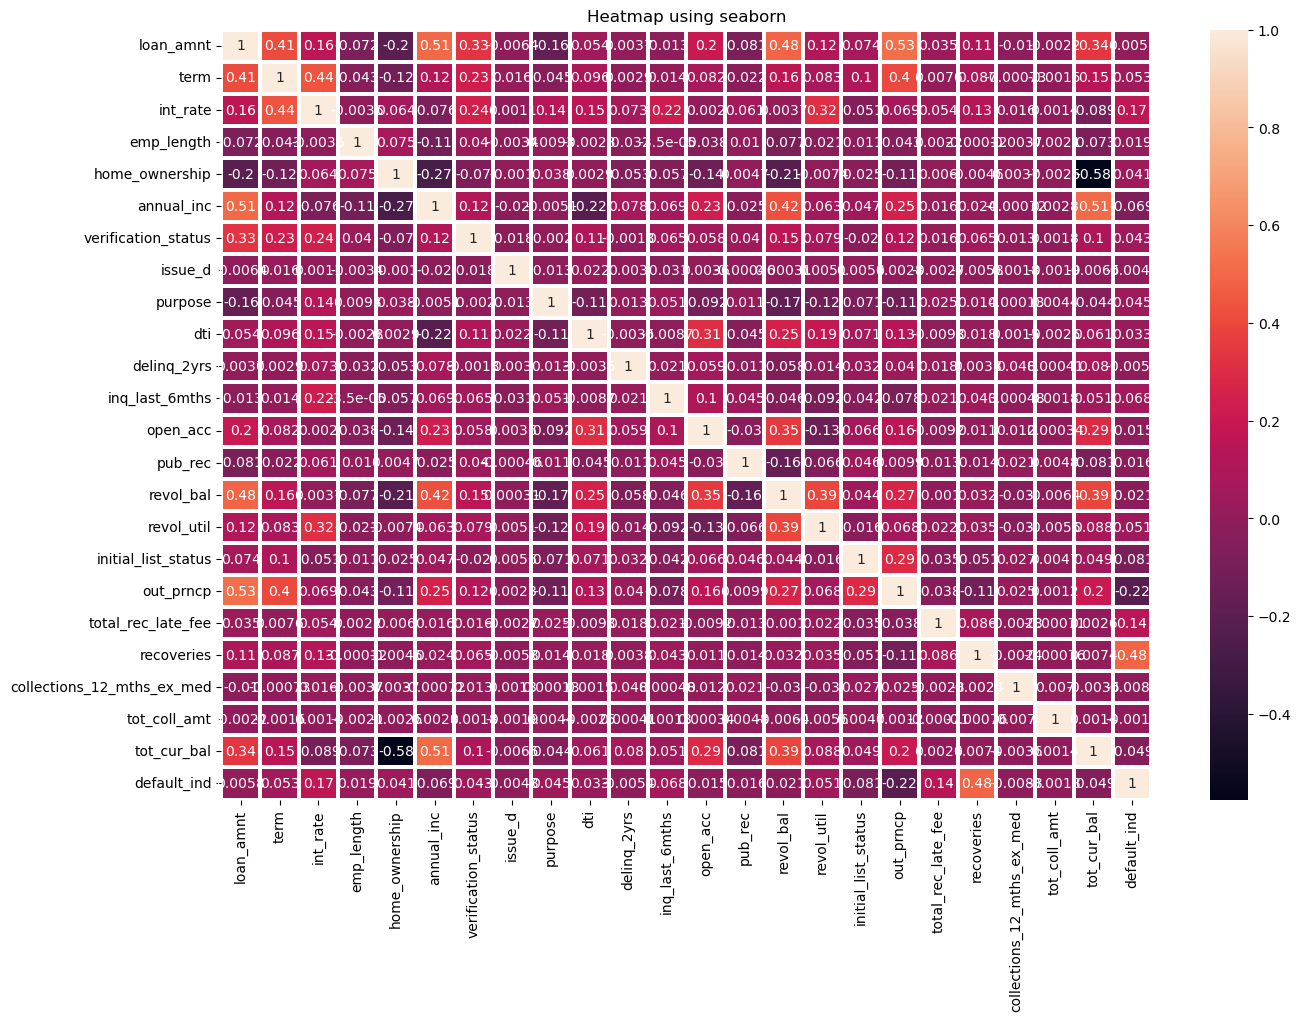

In [288]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(cr1,linewidth=1.5,annot=True)
plt.title("Heatmap using seaborn")
plt.show()

# Random under sampling

# LG

In [212]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [213]:
lg_p1=lg.predict(x_te)
lg_p1

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [214]:
lg_cf=confusion_matrix(y_te,lg_p1)  
lg_cf

array([[7519, 1181],
       [2067, 6556]], dtype=int64)

In [215]:
lg_ac1=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac1

81.25036079201062

In [216]:
print(classification_report(y_te,lg_p1))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      8700
           1       0.85      0.76      0.80      8623

    accuracy                           0.81     17323
   macro avg       0.82      0.81      0.81     17323
weighted avg       0.82      0.81      0.81     17323



In [217]:
lg_f2=f1_score(y_te,lg_p1)
lg_pr2=precision_score(y_te,lg_p1)
lg_r2=recall_score(y_te,lg_p1)
print(lg_f2,lg_pr2,lg_r2)

0.8014669926650366 0.8473568566627891 0.7602922416792299


# Decision tree-Random under sampling

In [218]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [219]:
dt_p1=dt.predict(x_te)
dt_p1

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [220]:
dt_c1=confusion_matrix(y_te,dt_p1)
dt_c1

array([[6998, 1702],
       [1703, 6920]], dtype=int64)

In [221]:
dt_ac1=dt_c1.diagonal().sum()/dt_c1.sum()*100
dt_ac1

80.34405126132886

In [222]:
print(classification_report(y_te,dt_p1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8700
           1       0.80      0.80      0.80      8623

    accuracy                           0.80     17323
   macro avg       0.80      0.80      0.80     17323
weighted avg       0.80      0.80      0.80     17323



In [223]:
dt_f2=f1_score(y_te,dt_p1)
dt_pr2=precision_score(y_te,dt_p1)
dt_r2=recall_score(y_te,dt_p1)
print(dt_f2,dt_pr2,dt_r2)

0.8025514641925195 0.8025980051032243 0.802504928679114


# Ramdom forest-Random under sampling

In [224]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [225]:
rf_p=rf.predict(x_te)
rf_p

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [226]:
rf_cf=confusion_matrix(y_te,rf_p) 
rf_cf

array([[7444, 1256],
       [1338, 7285]], dtype=int64)

In [227]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

85.02568839115627

In [228]:
print(classification_report(y_te,rf_p))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      8700
           1       0.85      0.84      0.85      8623

    accuracy                           0.85     17323
   macro avg       0.85      0.85      0.85     17323
weighted avg       0.85      0.85      0.85     17323



In [229]:
rf_f2=f1_score(y_te,rf_p)
rf_pr2=precision_score(y_te,rf_p)
rf_r2=recall_score(y_te,rf_p)
print(rf_f2,rf_pr2,rf_r2)

0.8488697273362852 0.8529446200679077 0.8448335845993273


# XGB-Random under sampling

In [230]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [231]:
xgb_p1=xgb.predict(x_te)

In [232]:
xgb_cf1=confusion_matrix(y_te,xgb_p1)
xgb_cf1

array([[7457, 1243],
       [1322, 7301]], dtype=int64)

In [233]:
xgb_ac1=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_ac1

85.19309588408474

In [234]:
print(classification_report(y_te,xgb_p1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      8700
           1       0.85      0.85      0.85      8623

    accuracy                           0.85     17323
   macro avg       0.85      0.85      0.85     17323
weighted avg       0.85      0.85      0.85     17323



In [235]:
xgb_f2=f1_score(y_te,xgb_p1)
xgb_pr2=precision_score(y_te,xgb_p1)
xgb_r2=recall_score(y_te,xgb_p1)
print(xgb_f2,xgb_pr2,xgb_r2)

0.8505854255257179 0.8545177902621723 0.846689087324597


# Naive bayes

In [236]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [237]:
nb_p1=nb.predict(x_te)

In [238]:
nb_cf1=confusion_matrix(y_te,nb_p1)
nb_cf1

array([[5116, 3584],
       [ 347, 8276]], dtype=int64)

In [239]:
nb_ac1=nb_cf1.diagonal().sum()/nb_cf1.sum()*100
nb_ac1

77.3076256999365

In [240]:
print(classification_report(y_te,nb_p1))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72      8700
           1       0.70      0.96      0.81      8623

    accuracy                           0.77     17323
   macro avg       0.82      0.77      0.77     17323
weighted avg       0.82      0.77      0.77     17323



In [241]:
nb_f2=f1_score(y_te,nb_p1)
nb_pr2=precision_score(y_te,nb_p1)
nb_r2=recall_score(y_te,nb_p1)
print(nb_f2,nb_pr2,nb_r2)

0.808084753209979 0.6978077571669478 0.959758784645715


In [242]:
A1=["Logistic","DT","Rf","XGB","NB"]
A2=[lg_ac1,dt_ac1,rf_ac,xgb_ac1,nb_ac1]
A3=[lg_pr2,dt_pr2,rf_pr2,xgb_pr2,nb_pr2]
A4=[lg_r2,dt_r2,rf_r2,xgb_r2,nb_r2]
A5=[lg_f2,dt_f2,rf_f2,xgb_f2,nb_f2]

In [243]:
df2=pd.DataFrame({"Model":A1,"Accuracy":A2,"Precision":A3,"Recall":A4,"f1_score":A5})
df2

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,81.250361,0.847357,0.760292,0.801467
1,DT,80.344051,0.802598,0.802505,0.802551
2,Rf,85.025688,0.852945,0.844834,0.848870
3,XGB,85.193096,0.854518,0.846689,0.850585
4,NB,77.307626,0.697808,0.959759,0.808085


Text(0.5, 1.0, 'Confusion\xa0Matrix')

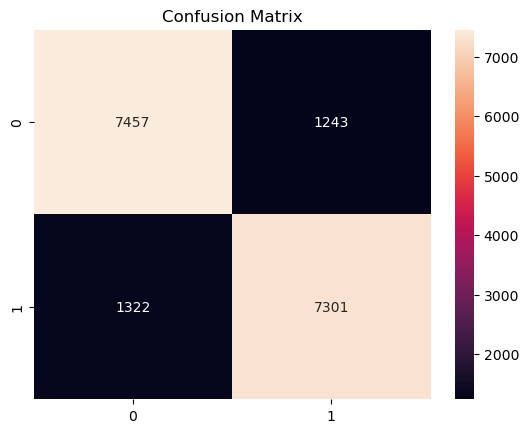

In [244]:
dtc1=confusion_matrix(y_te,xgb_p1)
dtc1
sns.heatmap(dtc1,annot=True,fmt='d')
plt.title('Confusion Matrix')

# Conclusion after applying the sampling technique:-

In [245]:
#CONCLUSION:
   #Undersampling-random-XGB:Highest Accuracy with low TN
                #-Imblearn-RF:Highest Accuracy with low TN
                #-Nearmiss-XGB:Highest Accuracy with High TN
    
    #Oversampling-Random-(RF&XGB):Highest Accuracy with high TN
                #-Smote-RF:Highest accuracy with High TN


# Feature selection

In [246]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [247]:
rfe=RFE(dtree,n_features_to_select=8)
rfe.fit(final_df.iloc[:,0:-1],final_df.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)

In [248]:
rfe.support_

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True])

In [249]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(final_df.iloc[:,0:-1].columns)})

In [250]:
f1

,feature,col
0,False,term
1,True,int_rate
2,False,emp_length
3,False,home_ownership
4,True,annual_inc
5,False,verification_status
6,False,issue_d
7,False,purpose
8,True,dti
9,False,delinq_2yrs


In [251]:
data4=final_df.drop(["term","emp_length","home_ownership","verification_status","issue_d",
"purpose","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","initial_list_status","total_rec_late_fee",
"collections_12_mths_ex_med",],axis=1)
data4

,int_rate,annual_inc,dti,revol_bal,revol_util,out_prncp,recoveries,tot_coll_amt,tot_cur_bal,default_ind
234395,12.99,35360.0,22.78,16026.0,82.6,4778.63,0.0,0.0,20184.0,0
436824,21.48,100000.0,22.91,12227.0,67.6,14032.90,0.0,581.0,73569.0,0
44068,16.24,40000.0,25.68,20986.0,95.4,5475.07,0.0,0.0,24624.0,0
272023,10.99,36000.0,14.11,1488.0,64.7,4483.85,0.0,0.0,3788.0,0
385669,15.61,110000.0,8.36,8456.0,55.3,0.00,0.0,0.0,382633.0,0
...,...,...,...,...,...,...,...,...,...,...
452241,23.40,45600.0,1.50,1199.0,14.6,0.00,0.0,0.0,1199.0,1
452243,16.99,50000.0,24.39,24551.0,83.8,0.00,0.0,0.0,34157.0,1
452263,18.25,37536.0,12.28,5318.0,10.7,0.00,1159.4,0.0,116995.0,1
452264,7.90,90000.0,10.33,8224.0,16.3,0.00,0.0,0.0,42592.0,1


In [252]:
test_data=test_data.drop(["loan_amnt","term","emp_length","home_ownership","verification_status","issue_d",
"purpose","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","initial_list_status","total_rec_late_fee",
"collections_12_mths_ex_med",],axis=1)
test_data

,int_rate,annual_inc,dti,revol_bal,revol_util,out_prncp,recoveries,tot_coll_amt,tot_cur_bal
500000,9.17,45000.0,12.53,6555.0,53.3,4756.69,0.0,0.0,151284.0
500001,7.89,81000.0,29.12,26200.0,96.3,11671.34,0.0,0.0,146285.0
500002,10.99,96000.0,21.04,13196.0,87.4,26673.70,0.0,0.0,112776.0
500003,12.05,100000.0,13.27,28916.0,100.8,5720.24,0.0,0.0,40188.0
500004,12.59,51000.0,16.00,13130.0,41.4,5340.98,0.0,0.0,18002.0
...,...,...,...,...,...,...,...,...,...
855964,11.99,31000.0,28.69,14037.0,82.1,7055.47,0.0,0.0,25274.0
855965,11.99,79000.0,3.90,8621.0,84.5,16933.26,0.0,0.0,140285.0
855966,15.99,35000.0,30.90,11031.0,61.3,11155.50,0.0,0.0,34178.0
855967,19.99,64400.0,27.19,8254.0,30.6,10447.31,0.0,0.0,58418.0


In [253]:
#Lg

In [254]:
x9=data4.iloc[: ,0:-1]
y9=data4.iloc[:,-1]

In [255]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x9,y9,test_size=0.2,random_state=101)
x_train5.shape,x_test5.shape,y_train5.shape,y_test5.shape

((69291, 9), (17323, 9), (69291,), (17323,))

In [256]:
from sklearn.linear_model import LogisticRegression
lg2=LogisticRegression()
lg2.fit(x_train5,y_train5)
lg_p9=lg2.predict(x_test5)
cf_9=confusion_matrix(y_test5,lg_p9)
cf_9

array([[7350, 1349],
       [1758, 6866]], dtype=int64)

In [257]:
lg_ac9=cf_9.diagonal().sum()/cf_9.sum()*100
lg_ac9

82.06430756797322

In [258]:
lg_recall_9=recall_score(y_test5,lg_p9)
lg_pre_9=precision_score(y_test5,lg_p9)
lg_f1_9=f1_score(y_test5,lg_p9,average="weighted")
print(classification_report(y_test5,lg_p9)) 

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      8699
           1       0.84      0.80      0.82      8624

    accuracy                           0.82     17323
   macro avg       0.82      0.82      0.82     17323
weighted avg       0.82      0.82      0.82     17323



# Dt

In [259]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier()
dt2.fit(x_train5,y_train5)
dt_p9=dt2.predict(x_test5)

dt_c9=confusion_matrix(y_test5,dt_p9)
dt_c9

array([[6862, 1837],
       [1735, 6889]], dtype=int64)

In [260]:
dt_ac9=dt_c9.diagonal().sum()/dt_c9.sum()*100
dt_ac9

79.38001500894765

In [261]:
dt_recall_9=recall_score(y_test5,dt_p9)
dt_pre_9=precision_score(y_test5,dt_p9)
dt_f1_9=f1_score(y_test5,dt_p9,average="weighted")
print(classification_report(y_test5,dt_p9))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      8699
           1       0.79      0.80      0.79      8624

    accuracy                           0.79     17323
   macro avg       0.79      0.79      0.79     17323
weighted avg       0.79      0.79      0.79     17323



# RF

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()
rf2.fit(x_train5,y_train5)
rf_p9=rf2.predict(x_test5)
rf_c9=confusion_matrix(y_test5,rf_p9)
rf_c9

array([[7253, 1446],
       [1456, 7168]], dtype=int64)

In [263]:
rf_ac9=rf_c9.diagonal().sum()/rf_c9.sum()*100
rf_ac9

83.24770536281244

In [264]:
rf_recall_9=recall_score(y_test5,rf_p9)
rf_pre_9=precision_score(y_test5,rf_p9)
rf_f1_9=f1_score(y_test5,rf_p9,average="weighted")
print(classification_report(y_test5,rf_p9))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8699
           1       0.83      0.83      0.83      8624

    accuracy                           0.83     17323
   macro avg       0.83      0.83      0.83     17323
weighted avg       0.83      0.83      0.83     17323



# XGBoost

In [265]:
import xgboost
from xgboost import XGBClassifier
xgb2=XGBClassifier()
xgb2.fit(x_train5,y_train5)
xgb_p9=xgb2.predict(x_test5)

xgb_c9=confusion_matrix(y_test5,xgb_p9)
xgb_c9

array([[7252, 1447],
       [1380, 7244]], dtype=int64)

In [266]:
xgb_ac9=xgb_c9.diagonal().sum()/xgb_c9.sum()*100
xgb_ac9

83.6806557755585

In [267]:
xgb_recall_9=recall_score(y_test5,xgb_p9)
xgb_pre_9=precision_score(y_test5,xgb_p9)
xgb_f1_9=f1_score(y_test5,xgb_p9,average="weighted")
print(classification_report(y_test5,xgb_p9))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      8699
           1       0.83      0.84      0.84      8624

    accuracy                           0.84     17323
   macro avg       0.84      0.84      0.84     17323
weighted avg       0.84      0.84      0.84     17323



# NB

In [268]:
from sklearn.naive_bayes import MultinomialNB
nb2=MultinomialNB()
nb2.fit(x_train5,y_train5)
nb_p9=nb2.predict(x_test5)
cf_n9=confusion_matrix(y_test5,nb_p9)
cf_n9

array([[5043, 3656],
       [ 272, 8352]], dtype=int64)

In [269]:
nb_ac9=cf_n9.diagonal().sum()/cf_n9.sum()*100
nb_ac9

77.32494371644634

In [270]:
nb_recall_9=recall_score(y_test5,nb_p9)
nb_pre_9=precision_score(y_test5,nb_p9)
nb_f1_9=f1_score(y_test5,nb_p9,average="weighted")
print(classification_report(y_test5,nb_p9))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      8699
           1       0.70      0.97      0.81      8624

    accuracy                           0.77     17323
   macro avg       0.82      0.77      0.76     17323
weighted avg       0.82      0.77      0.76     17323



In [271]:
F1=["Logistic","DT","Rf","XGB","NB"]
F2=[lg_ac9,dt_ac9,rf_ac9,xgb_ac9,nb_ac9]
F3=[lg_pre_9,dt_pre_9,rf_pre_9,xgb_pre_9,nb_pre_9]
F4=[lg_recall_9,dt_recall_9,rf_recall_9,xgb_recall_9,nb_recall_9]
F5=[lg_f1_9,dt_f1_9,rf_f1_9,xgb_f1_9,nb_f1_9]

In [272]:
df4=pd.DataFrame({"Model":F1,"Accuracy":F2,"Precision":F3,"Recall":F4,"f1_score":F5})
df4

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,82.064308,0.835788,0.796150,0.820525
1,DT,79.380015,0.789480,0.798817,0.793798
2,Rf,83.247705,0.832134,0.831169,0.832477
3,XGB,83.680656,0.833506,0.839981,0.836807
4,NB,77.324944,0.695536,0.968460,0.764468


Text(0.5, 1.0, 'Confusion\xa0Matrix')

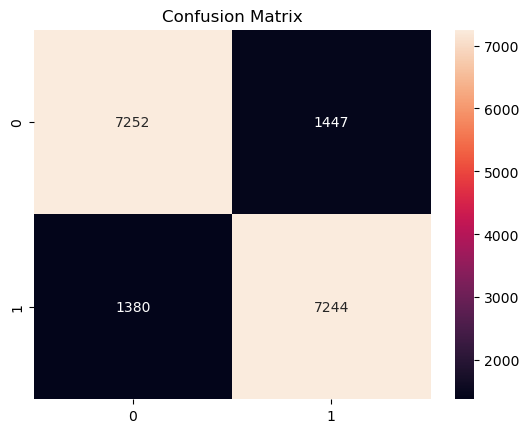

In [273]:
dtc2=confusion_matrix(y_test5,xgb_p9)
dtc2
sns.heatmap(dtc2,annot=True,fmt='d')
plt.title('Confusion Matrix')

In [274]:
#Conclusion:
  #XGB:High accuracy with low TN on doing Feature Selection using Decision tree classification
  #TN Low: Used AUC ROC Curve       

In [275]:
#AUC-ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [276]:
roc=roc_auc_score(xgb_p9,y_test5)
roc

0.8368178377192688

In [277]:
prob=xgb2.predict_proba(x_test5)

In [278]:
d_fr=pd.DataFrame(prob)
#d_fr

In [279]:
fpr,tpr,threshold=roc_curve(y_test5,d_fr.iloc[:,1])
#fpr,tpr,threshold  

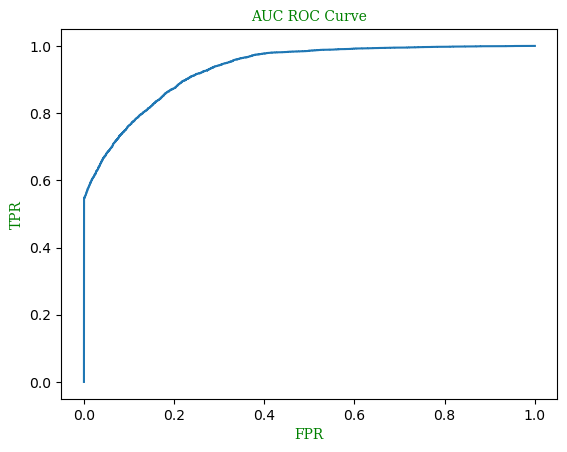

In [280]:
plt.plot(fpr,tpr)
font1={"family":"serif", "color":"green","size":10}
plt.title("AUC ROC Curve",fontdict=font1)
plt.xlabel("FPR",fontdict=font1)
plt.ylabel("TPR",fontdict=font1)
plt.show()

# prediction on test data

In [281]:
predictions=xgb2.predict(test_data)

In [282]:
predictions

array([0, 0, 0, ..., 0, 0, 0])